In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from glob import glob
import koreanize_matplotlib
import datetime as dt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
!pip install fastparquet

In [3]:
!pip install koreanize-matplotlib

In [4]:
file_list = glob('mini_data/6*.parquet')
file_list

['mini_data/6candoit.parquet']

In [5]:
df=pd.read_parquet(file_list[0])
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
29857089,2019-10-22 11:02:15 UTC,view,5000487,2053013566100866035,appliances.sewing_machine,janome,1265.80,547734601,708ae7a4-398a-4ff7-bb8c-5a4fe1e6efc3
5542128,2019-10-05 10:18:33 UTC,view,10400516,2053013553257906447,kids.toys,woddon,31.30,518668802,58bcf566-8410-4672-8104-9c7089625acb
32275151,2019-10-24 06:29:48 UTC,view,8700583,2053013563097744201,appliances.personal.hair_cutter,braun,97.79,553901554,c26cb571-4d54-440e-bf77-a1a5805a10e5


In [7]:
df.nunique()

event_time        4529222
event_type              3
product_id         182125
category_id           687
category_code         129
brand                4136
price               71717
user_id           3336230
user_session     10303388
dtype: int64

In [8]:
df = df.sort_index()
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
14,2019-10-01 00:00:16 UTC,view,13500240,2053013557099889147,furniture.bedroom.bed,brw,93.18,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4


In [9]:
df.dtypes

event_time       category
event_type       category
product_id          int64
category_id        uint64
category_code    category
brand            category
price             float64
user_id             int64
user_session     category
dtype: object

### eventime datetime으로 변경

In [10]:
df["event_time"] = pd.to_datetime(df["event_time"])

### 구매자 데이터

In [11]:
df_p = df[(df['event_type']=='purchase')]
df_p

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
672,2019-10-01 00:10:56+00:00,purchase,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0
860,2019-10-01 00:14:14+00:00,purchase,1004932,2053013555631882655,electronics.smartphone,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562
1107,2019-11-01 00:07:38+00:00,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1
2309,2019-11-01 00:15:23+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1348.61,518840496,ef3daa59-4936-43e5-a530-32902f64b2f4
2539,2019-10-01 02:22:23+00:00,purchase,1307135,2053013558920217191,computers.notebook,hp,320.35,514805015,104dc3e4-d6ff-4f00-9031-c0468e75ed4c
...,...,...,...,...,...,...,...,...,...
67500000,2019-11-30 23:46:55+00:00,purchase,1004766,2053013555631882655,electronics.smartphone,samsung,236.25,562742398,cac58091-0e53-4ac6-ae96-642577efc40f
67500223,2019-11-30 23:48:06+00:00,purchase,5100816,2053013553375346967,NaN,xiaomi,32.15,543234577,4e5830ae-dce9-41ac-b087-3eb38ecbc660
67500333,2019-11-30 23:48:41+00:00,purchase,1201369,2053013561059312345,electronics.tablet,prestigio,96.24,512363650,703feaa9-f999-4934-b878-235c2a5076c8
67500609,2019-11-30 23:50:31+00:00,purchase,26200211,2053013563693335403,NaN,NaN,277.74,515162380,2842d0e9-4601-49c9-9473-9647f4fca897


In [12]:

df["hour"] = df["event_time"].dt.hour
df["dow"] = df["event_time"].dt.dayofweek
df["YMD"] = df["event_time"].dt.date



In [13]:
first_date = df.sort_values(by=["event_time"]).iloc[0]["event_time"].date()
df['week'] = df['event_time'].apply(lambda x: (x.date() - first_date).days // 7 + 1)

In [14]:
df["YM"] = df["event_time"].astype(str).str[:7]

In [15]:
df[["event_time","hour","dow","YM","YMD", 'week']].head()

,event_time,hour,dow,YM,YMD,week
5,2019-11-01 00:00:01+00:00,0,4,2019-11,2019-11-01,5
6,2019-10-01 00:00:08+00:00,0,1,2019-10,2019-10-01,1
7,2019-10-01 00:00:08+00:00,0,1,2019-10,2019-10-01,1
8,2019-10-01 00:00:10+00:00,0,1,2019-10,2019-10-01,1
14,2019-10-01 00:00:16+00:00,0,1,2019-10,2019-10-01,1


## 방문자수

In [39]:
visitor = df['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 3336230


In [16]:
day_name =  [w for w in "월화수목금토일"]
day_name

['월', '화', '수', '목', '금', '토', '일']

In [17]:
dow = df["dow"].value_counts().sort_index()
dow = dow * 5.49
dow.index = day_name
dow

월    12908263.68
화    14561445.42
수    14334944.49
목    14927013.54
금    18099256.32
토    18029769.39
일    16939307.16
Name: dow, dtype: float64

### 요일별 시간에 따른 방문자 수
- 금요일 오후3~5시가 사용자 수가 많음을 보여주며 금요일 오후 4시가 사용자 수가 가장 많음을 보여준다.
그다음으로는 일요일, 토요일 순으로 주말과 가까워질수록 사용자 수가 증가함을 보여준다.
- 요일에 따른 마케팅 전략을 통해 사용자 수를 늘릴도록 한다. ex) 주말할인?

In [36]:
hour_week = pd.crosstab(df["hour"], df["dow"])
hour_week = hour_week * 5.49
hour_week.columns = day_name
hour_week.style.background_gradient(axis=None, cmap="Blues")

,월,화,수,목,금,토,일
hour,,,,,,,
0,94609.170000,92347.290000,97249.860000,106615.800000,159402.150000,111447.000000,101965.770000
1,182355.840000,159105.690000,180862.560000,161872.650000,279704.520000,268856.280000,174516.120000
2,322702.200000,338722.020000,351420.390000,353523.060000,530443.800000,488214.720000,360407.520000
3,474670.890000,513336.960000,509175.540000,514100.070000,707435.910000,646936.110000,590416.560000
4,582873.300000,632491.920000,636186.690000,642368.430000,822802.770000,846684.270000,813189.780000
5,657405.540000,723818.070000,723949.830000,671487.390000,894732.750000,959152.410000,912728.970000
6,684904.950000,780798.780000,761095.170000,746865.090000,912070.170000,1006437.780000,933788.610000
7,664388.820000,807183.720000,775863.270000,769791.330000,941880.870000,1017000.540000,949555.890000
8,684081.450000,830658.960000,806771.970000,800694.540000,1009440.810000,1006476.210000,950121.360000


In [23]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    6429834
brand            2808162
price                  0
user_id                0
user_session           1
hour                   0
dow                    0
YMD                    0
week                   0
YM                     0
dtype: int64

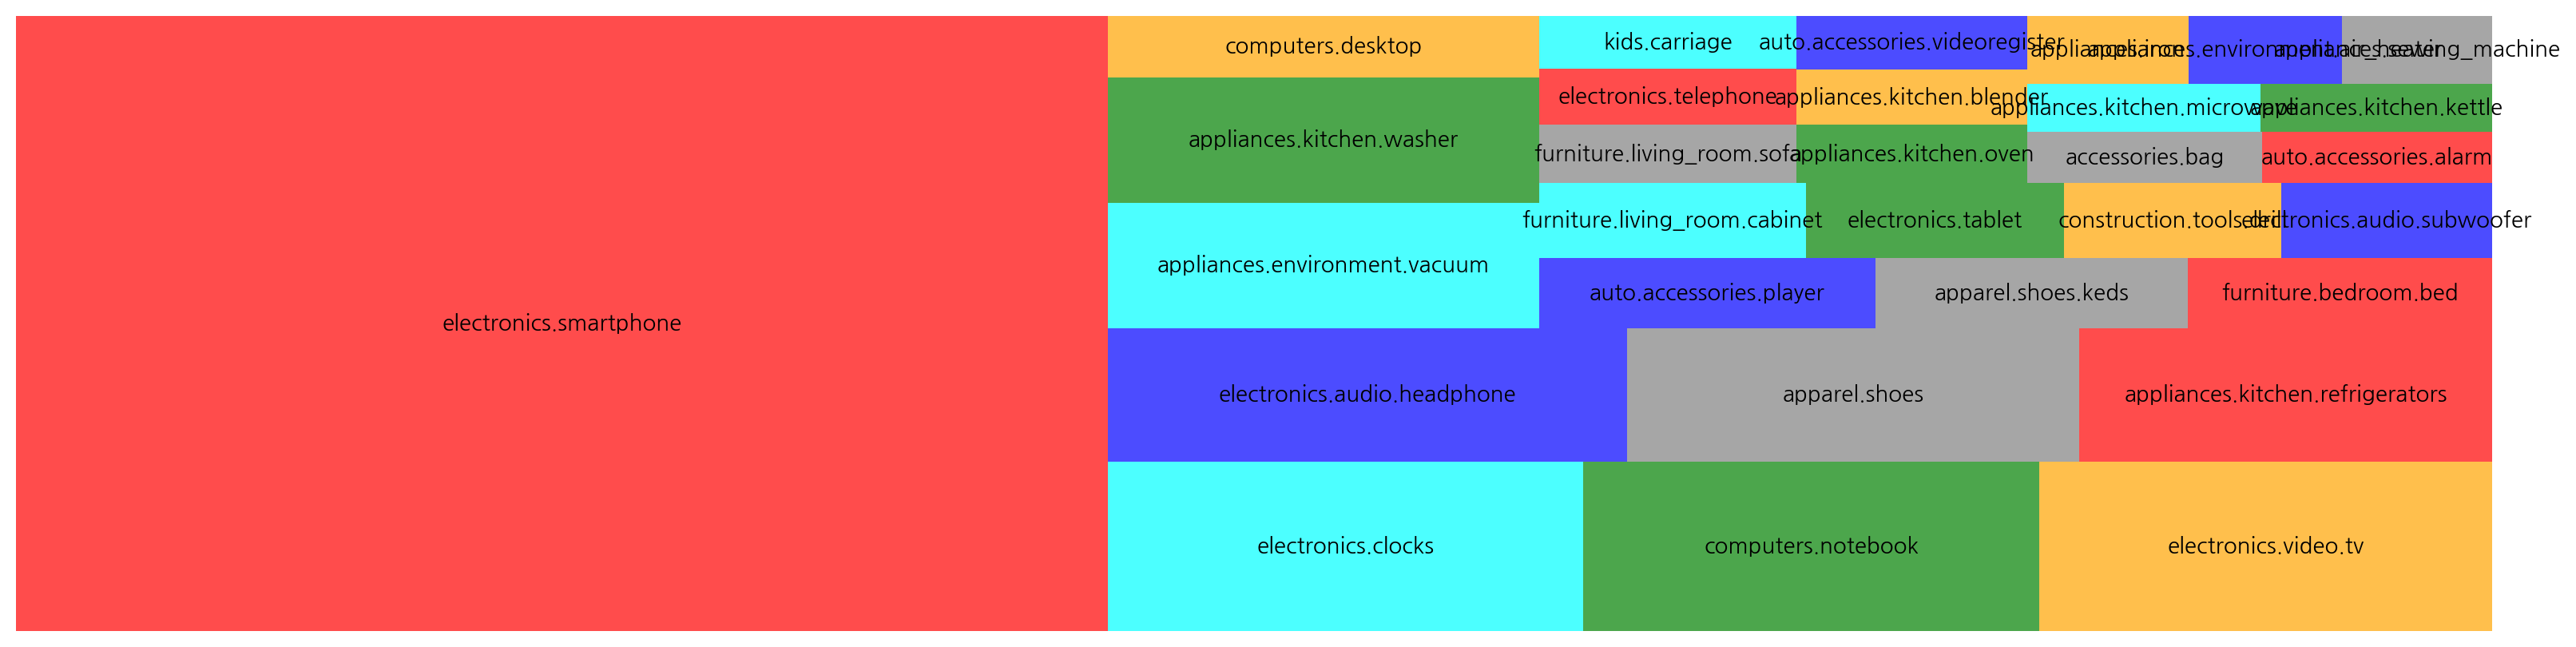

In [59]:
import squarify
import matplotlib.pyplot as plt

top_category_n = 30
top_category = df['category_code'].value_counts()[:top_category_n].sort_values(ascending=False)

sizes = top_category.values
labels = top_category.index.array
colors = ["red", "cyan", "green", "orange", "blue", "grey"]
alpha = 0.7

plt.figure(figsize=(20, 5))  # 가로 12인치, 세로 10인치로 설정

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=alpha)
plt.axis('off')
plt.show()


### 방문자수에서 구매자 수는 매우 적음

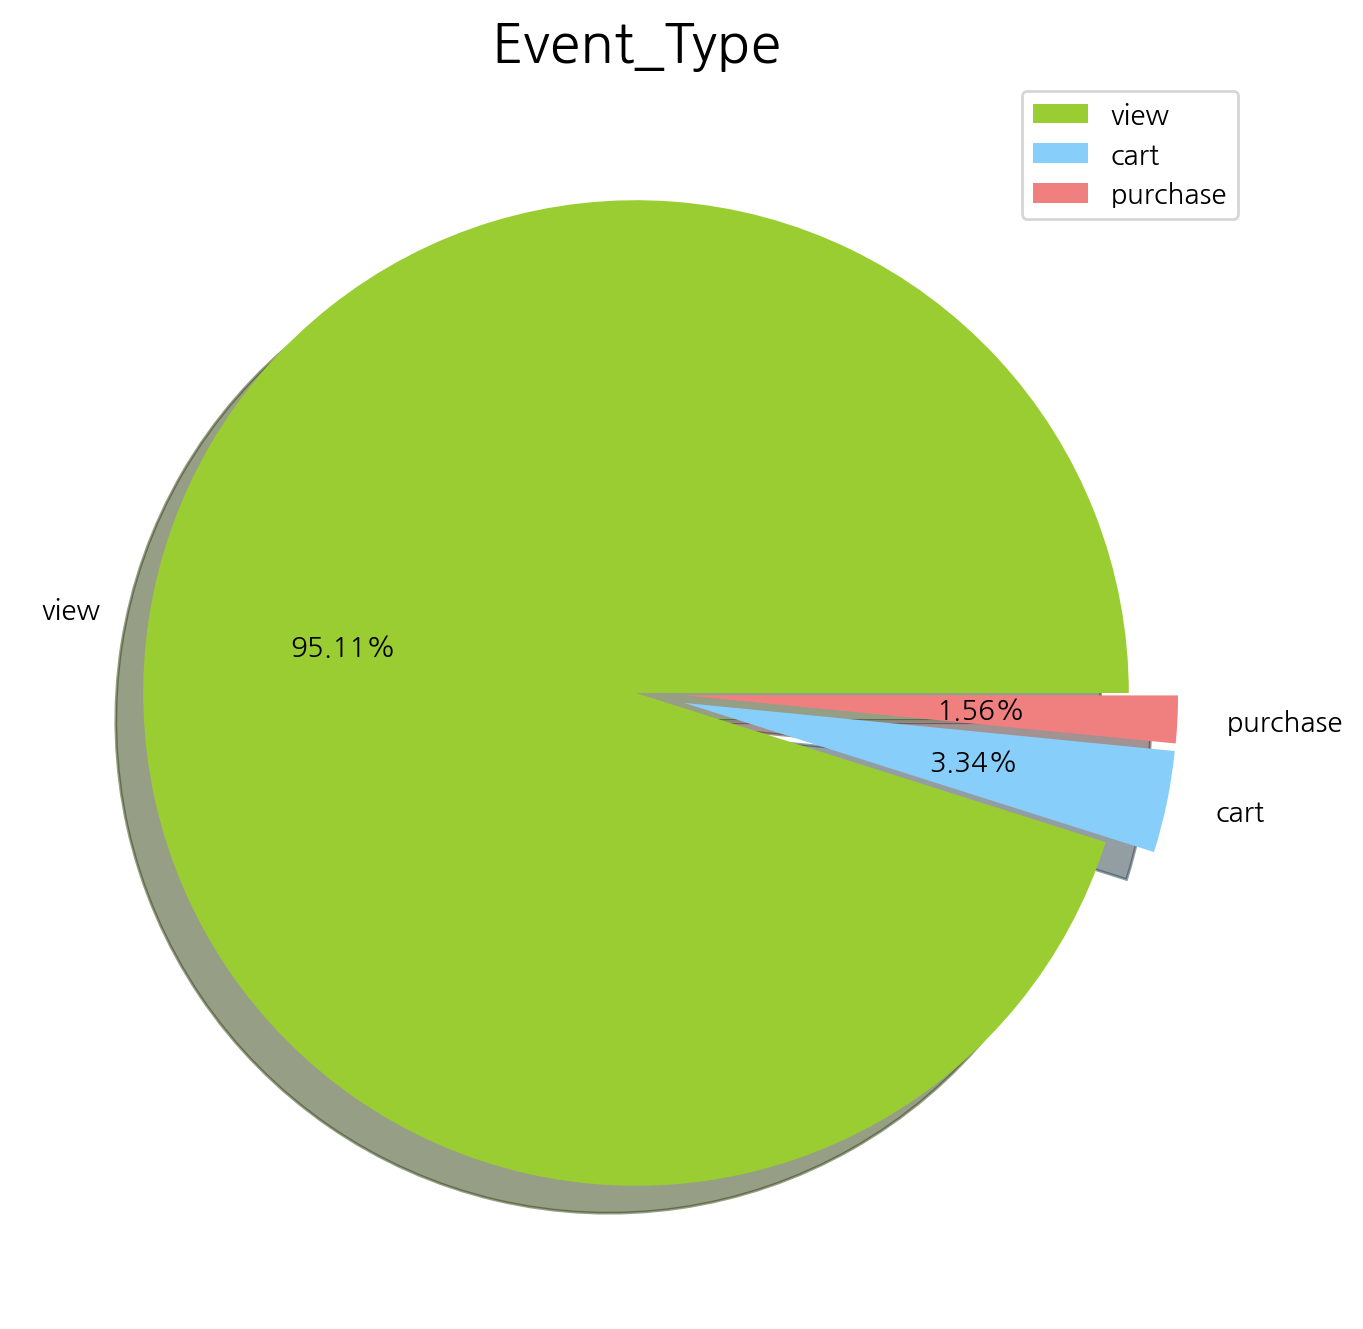

In [60]:
labels = ['view', 'cart','purchase']
size = df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## 구매자수

In [24]:
df_p = df[(df['event_type']=='purchase')]
df_p

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,dow,YMD,week,YM
672,2019-10-01 00:10:56+00:00,purchase,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0,0,1,2019-10-01,1,2019-10
860,2019-10-01 00:14:14+00:00,purchase,1004932,2053013555631882655,electronics.smartphone,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562,0,1,2019-10-01,1,2019-10
1107,2019-11-01 00:07:38+00:00,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1,0,4,2019-11-01,5,2019-11
2309,2019-11-01 00:15:23+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1348.61,518840496,ef3daa59-4936-43e5-a530-32902f64b2f4,0,4,2019-11-01,5,2019-11
2539,2019-10-01 02:22:23+00:00,purchase,1307135,2053013558920217191,computers.notebook,hp,320.35,514805015,104dc3e4-d6ff-4f00-9031-c0468e75ed4c,2,1,2019-10-01,1,2019-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67500000,2019-11-30 23:46:55+00:00,purchase,1004766,2053013555631882655,electronics.smartphone,samsung,236.25,562742398,cac58091-0e53-4ac6-ae96-642577efc40f,23,5,2019-11-30,9,2019-11
67500223,2019-11-30 23:48:06+00:00,purchase,5100816,2053013553375346967,NaN,xiaomi,32.15,543234577,4e5830ae-dce9-41ac-b087-3eb38ecbc660,23,5,2019-11-30,9,2019-11
67500333,2019-11-30 23:48:41+00:00,purchase,1201369,2053013561059312345,electronics.tablet,prestigio,96.24,512363650,703feaa9-f999-4934-b878-235c2a5076c8,23,5,2019-11-30,9,2019-11
67500609,2019-11-30 23:50:31+00:00,purchase,26200211,2053013563693335403,NaN,NaN,277.74,515162380,2842d0e9-4601-49c9-9473-9647f4fca897,23,5,2019-11-30,9,2019-11


In [25]:
purchase_dow = df_p["dow"].value_counts().sort_index()
purchase_dow = purchase_dow * 5.49
purchase_dow.index = day_name
purchase_dow

월    210536.01
화    226072.71
수    233264.61
목    226402.11
금    218260.44
토    257041.80
일    336295.44
Name: dow, dtype: float64

### 요일별 시간대 구매자수
- 일요일 오전10시가 가장 높은 구매율을 보여주며 전체적으로 주말 오전시간에 몰려있는 형태를 보여준다
- 요일별 시간대에 맞는 마케팅전략
- 성과분석
- 구매자 선호도 분석

In [37]:
p_hour_dow = pd.crosstab(df_p["hour"], df_p["dow"])
p_hour_dow = p_hour_dow *5.49
p_hour_dow.columns = day_name
p_hour_dow.style.background_gradient(axis=None, cmap="Blues")

,월,화,수,목,금,토,일
hour,,,,,,,
0,861.930000,850.950000,823.500000,971.730000,955.260000,774.090000,746.640000
1,1608.570000,1301.130000,1685.430000,1471.320000,1690.920000,1614.060000,1098.000000
2,4139.460000,4166.910000,4375.530000,4584.150000,3996.720000,3288.510000,2887.740000
3,8130.690000,9404.370000,9074.970000,9739.260000,8767.530000,7570.710000,7757.370000
4,11913.300000,12231.720000,12522.690000,12643.470000,11962.710000,10958.040000,16420.590000
5,13757.940000,14795.550000,15026.130000,14043.420000,13774.410000,13274.820000,20872.980000
6,14378.310000,16310.790000,16222.950000,16019.820000,14400.270000,14586.930000,22596.840000
7,14284.980000,17079.390000,16151.580000,16579.800000,15399.450000,15196.320000,22739.580000
8,15037.110000,17320.950000,16728.030000,16623.720000,15597.090000,19308.330000,23837.580000


## 구매 브랜드 탑20

In [62]:
top_sellers = df_p.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,70299
apple,58107
xiaomi,23406
huawei,9050
cordiant,5084
lucente,4816
oppo,4808
lg,3957
sony,3087


### 일별 ARPU

In [35]:
arpu = df.groupby(["YMD"]).agg({"price": "sum", 
                                             "user_id": "nunique"})
arpu["ARPU"] = arpu["price"] / arpu["user_id"]
arpu


,price,user_id,ARPU
YMD,,,
2019-10-01,87385981.56,111961,780.503761
2019-10-02,84178472.71,107854,780.485404
2019-10-03,80032157.51,100602,795.532470
2019-10-04,99539282.20,124700,798.230010
2019-10-05,93370981.42,116132,804.007349
...,...,...,...
2019-11-26,67511398.05,115265,585.705965
2019-11-27,67576084.04,117220,576.489371
2019-11-28,70076499.18,116379,602.140413


### 11월 15일이 가장 높은 것을 알 수 있음

<AxesSubplot:xlabel='YMD'>

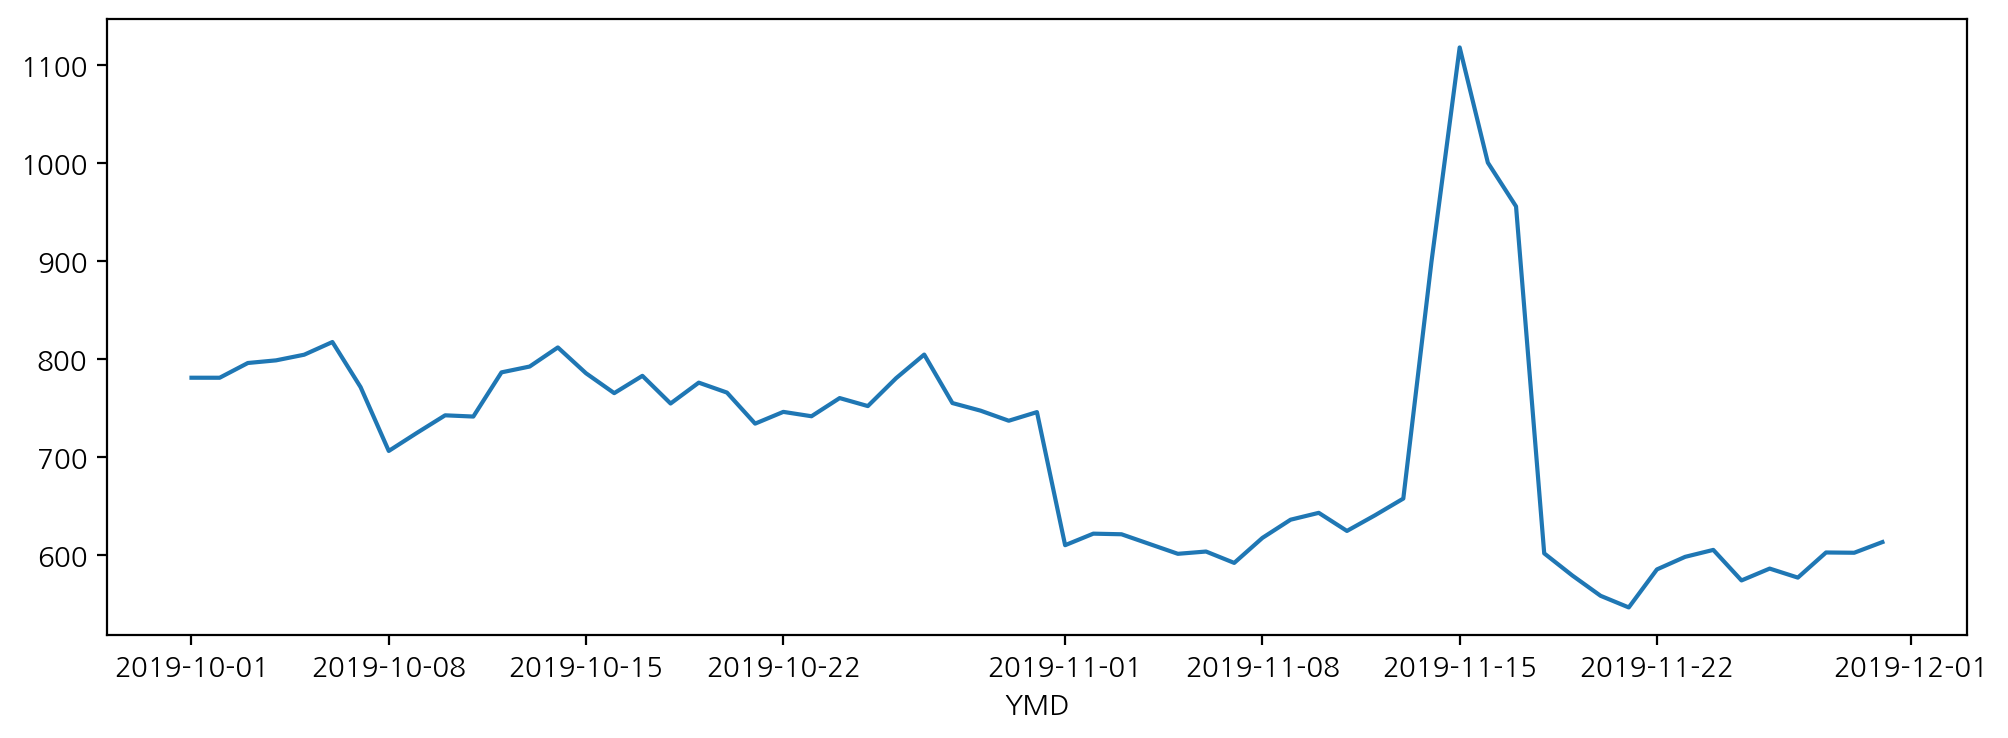

In [49]:
arpu["ARPU"].plot(figsize=(12, 4))

In [50]:
df_valid.groupby("user_id").agg({"user_session":"count", "price":["mean","sum"]})

user_session    price        
                 count     mean     sum
user_id                                
29515875             1  153.670  153.67
31198833             2  165.100  330.20
41798457             1  945.970  945.97
49484535             5   88.082  440.41
50383810             1  199.140  199.14
...                ...      ...     ...
579967711            2   36.600   73.20
579968273            2   62.910  125.82
579969045            1  912.500  912.50
579969053            1   77.200   77.20
579969711            1  208.470  208.47

[3334743 rows x 3 columns]

In [132]:
df_p_valid = df_p[df_p["user_id"].notnull()
             & (df_p["price"] > 0)].copy()
df_p.shape, df_p_valid.shape

((311088, 16), (311088, 16))

### 일별 ARPPU

In [133]:
arppu = df_p.groupby(["YMD"]).agg({"price": "sum", 
                                             "user_id": "nunique"})
arppu["ARPPU"] = arppu["price"] / arppu["user_id"]
arppu


,price,user_id,ARPPU
YMD,,,
2019-10-01,1470969.13,4106,358.248692
2019-10-02,1459641.44,4168,350.201881
2019-10-03,1449575.26,4069,356.248528
2019-10-04,2017164.55,5658,356.515474
2019-10-05,1715921.56,4991,343.803158
2019-10-06,1599475.45,4659,343.308747
2019-10-07,1480233.59,4368,338.881316
2019-10-08,1627575.85,4838,336.415017
2019-10-09,1720177.66,4826,356.439631


### 10월14일과 11월 15일이 높은것을볼수있음

<Axes: xlabel='YMD'>

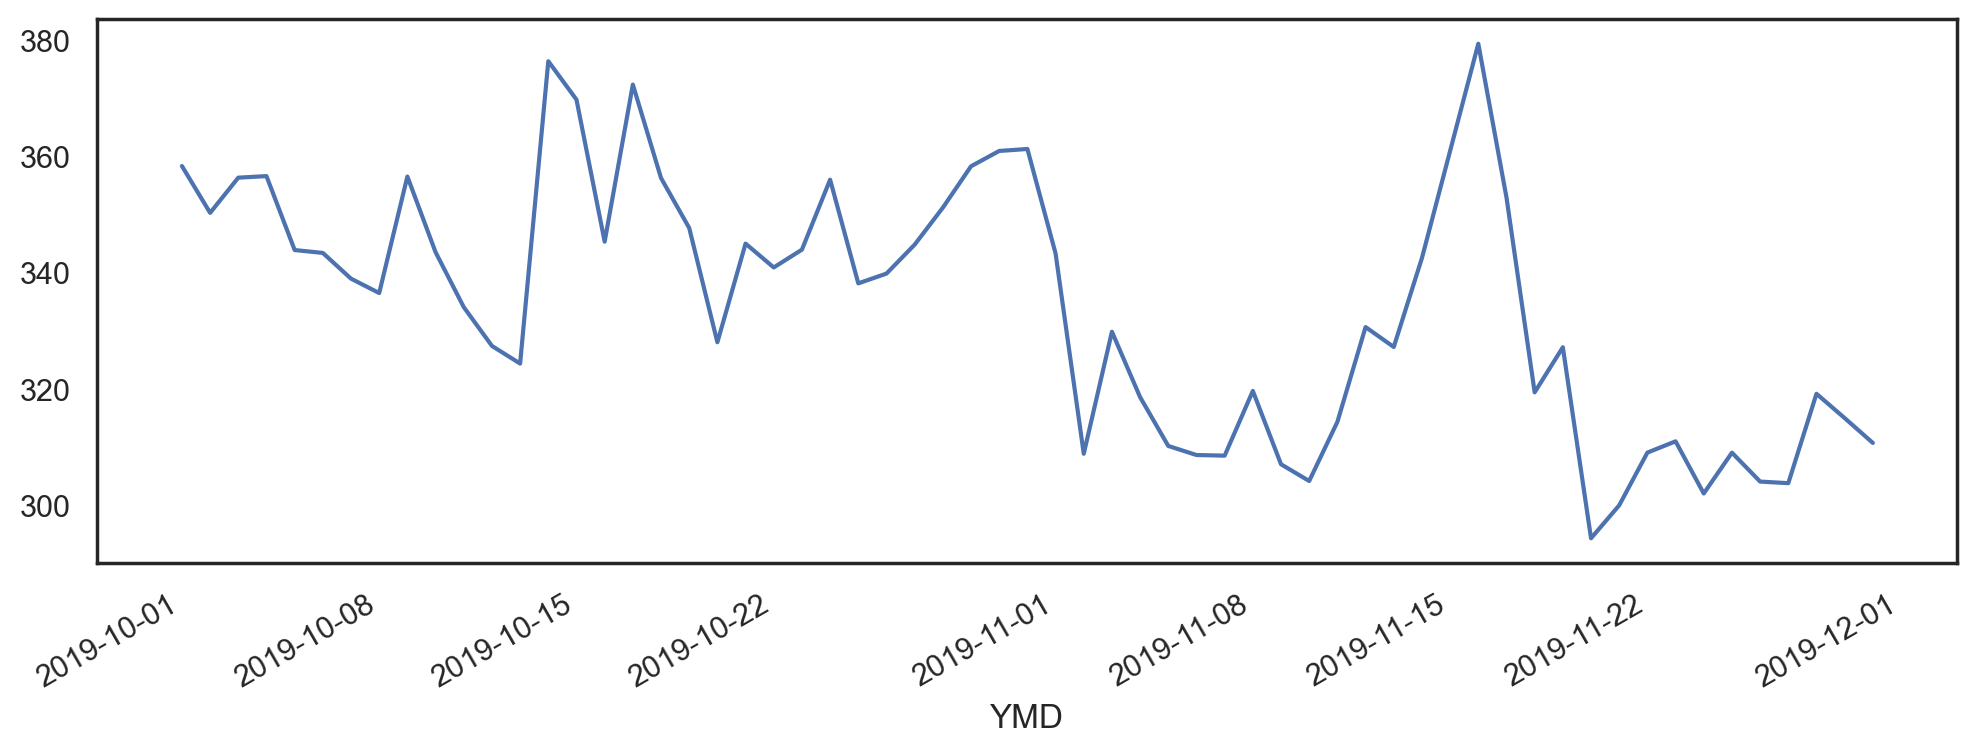

In [134]:
arppu["ARPPU"].plot(figsize=(12, 4))

### 사용자수
- 11월이 더 높은 것을 알 수 있음

### MAU

In [135]:
df_valid.groupby("YM").agg({"user_id":"nunique"})

,user_id
YM,
2019-10,1984244
2019-11,2143862


### DAU

In [136]:
df_valid.groupby("YMD").agg({"user_id":"nunique"})

,user_id
YMD,
2019-10-01,1984244
2019-11-01,2143862


### 월단위 데이터 전처리

In [137]:
df_p_valid["YMD"] = pd.to_datetime(df_p_valid["YM"])

In [138]:
df_p_valid["YMDMin"] = df_p_valid.groupby("user_id")["YMD"].transform("min")
df_p_valid[["user_id", "event_time", "YMD", "YMDMin"]]

,user_id,event_time,YMD,YMDMin
672,548691404,2019-10-01 00:10:56+00:00,2019-10-01,2019-10-01
860,555083442,2019-10-01 00:14:14+00:00,2019-10-01,2019-10-01
1107,515240495,2019-11-01 00:07:38+00:00,2019-11-01,2019-11-01
2309,518840496,2019-11-01 00:15:23+00:00,2019-11-01,2019-10-01
2539,514805015,2019-10-01 02:22:23+00:00,2019-10-01,2019-10-01
...,...,...,...,...
67500000,562742398,2019-11-30 23:46:55+00:00,2019-11-01,2019-11-01
67500223,543234577,2019-11-30 23:48:06+00:00,2019-11-01,2019-11-01
67500333,512363650,2019-11-30 23:48:41+00:00,2019-11-01,2019-10-01
67500609,515162380,2019-11-30 23:50:31+00:00,2019-11-01,2019-11-01


### 재방문율
- 고객들의 충성도나 만족도를 파악할 수 있음
- 재방문율이 높은 고객들에게 멤버쉽 혜택 제공
- 재방문율이 낮은 고객들에게는 프로모션 제공하여 재방문 유도

In [139]:
df_p['YMD'] = pd.to_datetime(df_p['YMD'])

/var/folders/w6/twxt5k_n5_b_c_6wxrghrwvm0000gn/T/ipykernel_15887/2740717663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['YMD'] = pd.to_datetime(df_p['YMD'])


In [140]:
df_re = df_p[['user_id', 'YMD']].copy()

In [141]:
df_re['first_visit'] = df_re.groupby('user_id')['YMD'].transform('min')
df_re['return_visit'] = df_re['YMD'] > df_re['first_visit']

In [142]:
df_re['visit_count'] = df_re.groupby('user_id')['user_id'].transform('count')
df_re['return_count'] = df_re.groupby('user_id')['return_visit'].transform('sum')

In [143]:
df_re['return_rate'] = df_re['return_count'] / df_re['visit_count']

In [144]:
df_re = df_re.drop_duplicates('user_id')[['user_id', 'return_rate']]

In [145]:
df_re

,user_id,return_rate
672,548691404,0.000000
860,555083442,0.500000
1107,515240495,0.000000
2309,518840496,0.909091
2539,514805015,0.000000
...,...,...
67498225,515064042,0.000000
67498842,579962208,0.000000
67499872,573127657,0.000000
67500223,543234577,0.000000


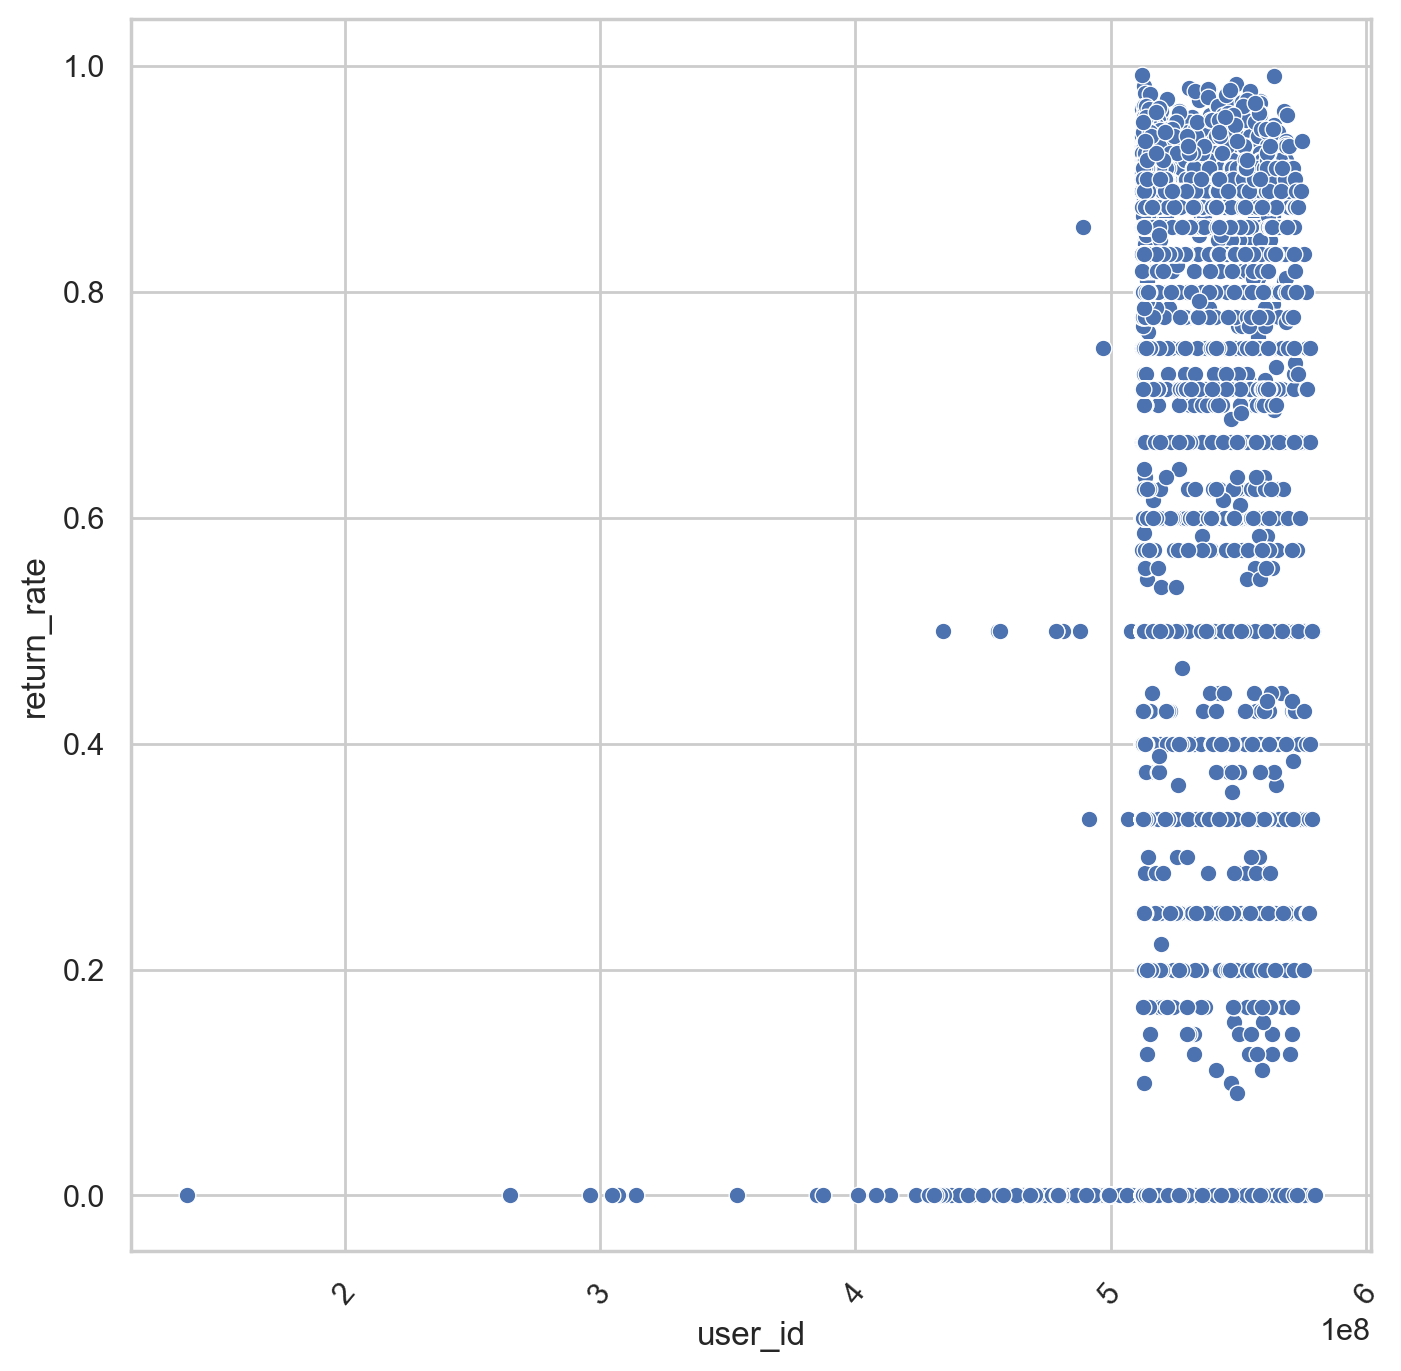

In [146]:
sns.set_style('whitegrid')
sns.scatterplot(x='user_id', y='return_rate', data=df_re)
plt.xticks(rotation=50)
plt.show()

### 재방문율이 높은 상위 10명에 대한 데이터

In [147]:
top_10_users = df_re.groupby('user_id')['return_rate'].mean().nlargest(10).index.tolist()
df_top_10 = df_re[df_re['user_id'].isin(top_10_users)]

In [148]:
df_top_10

,user_id,return_rate
28445,530834332,0.980000
73659,513117637,0.982456
390158,564068124,0.990476
445625,512386086,0.991379
473732,538473314,0.979592
526019,549030056,0.984127
834426,533074223,0.977273
1740177,538340540,0.979592
1742698,554551310,0.977273
6201811,546967331,0.978723


### 주별 코호트 빈도수
- 고객 충성도 분석: 고객이 자주 방문하고 구매하는 것이 중요한 온라인 비즈니스에서, 주간 코호트 빈도수는 고객 충성도 분석에 중요한 역할을 합니다. 특정 기간에 새로 유입된 고객을 기준으로, 그룹별로 몇 번 방문하는지 측정하여 고객의 충성도를 파악할 수 있습니다. 이를 통해 고객 그룹 중 어떤 그룹이 가장 충성도가 높은지, 어떤 그룹이 유지에 어려움이 있는지 등을 파악할 수 있습니다.

- 마케팅 효과 분석: 주간 코호트 빈도수는 마케팅 효과 분석에도 활용될 수 있습니다. 특정 기간에 실행한 마케팅 캠페인에 대해 새로 유입된 고객을 기준으로, 그룹별로 몇 번 방문하는지 측정하여 해당 캠페인의 효과를 분석할 수 있습니다.

- 제품 개발 분석: 주간 코호트 빈도수는 제품 개발 분석에도 유용합니다. 새로운 제품이나 기능을 추가한 후, 해당 기간에 새로 유입된 고객을 기준으로, 그룹별로 몇 번 방문하는지 측정하여 새로운 기능이나 제품이 사용자에게 만족스러운지 파악할 수 있습니다.

- 수익성 분석: 주간 코호트 빈도수는 수익성 분석에도 활용될 수 있습니다. 고객 그룹별로 몇 번 방문하는지 측정하여, 해당 고객 그룹이 전체 매출에서 어느 정도의 비중을 차지하는지 파악할 수 있습니다. 이를 통해, 수익성이 높은 고객 그룹을 파악하고 해당 그룹에 집중적인 마케팅 또는 서비스 개발을 수행할 수 있습니다.

In [149]:
df_p['cohort_week'] = df_p.groupby('user_id')['week'].transform('min')
df_p['cohort_index'] = (df_p['week'] - df_p['cohort_week']) // 1

/var/folders/w6/twxt5k_n5_b_c_6wxrghrwvm0000gn/T/ipykernel_15887/3223358838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['cohort_week'] = df_p.groupby('user_id')['week'].transform('min')
/var/folders/w6/twxt5k_n5_b_c_6wxrghrwvm0000gn/T/ipykernel_15887/3223358838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['cohort_index'] = (df_p['week'] - df_p['cohort_week']) // 1


In [150]:
cohorts = df_p.groupby(['cohort_week', 'cohort_index']) \
            .agg(n_customers=('user_id', 'nunique'),
                 n_orders=('event_type', 'count')) \
            .reset_index(drop=False)

In [151]:
initial_users = cohorts[cohorts['cohort_index'] == 0][['cohort_week', 'n_customers']]
initial_users = initial_users.rename(columns={'n_customers': 'n_users'})
cohorts = pd.merge(cohorts, initial_users, on='cohort_week')
cohorts['purchase_rate'] = cohorts['n_customers'] / cohorts['n_users']

In [152]:
retention_matrix = cohorts.pivot(index='cohort_week',
                                 columns='cohort_index',
                                 values='purchase_rate')

/Users/tndus/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.draw()
/Users/tndus/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/Users/tndus/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
/Users/tndus/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.draw()
/Users/tndus/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.draw()
/Users/tndus/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missin

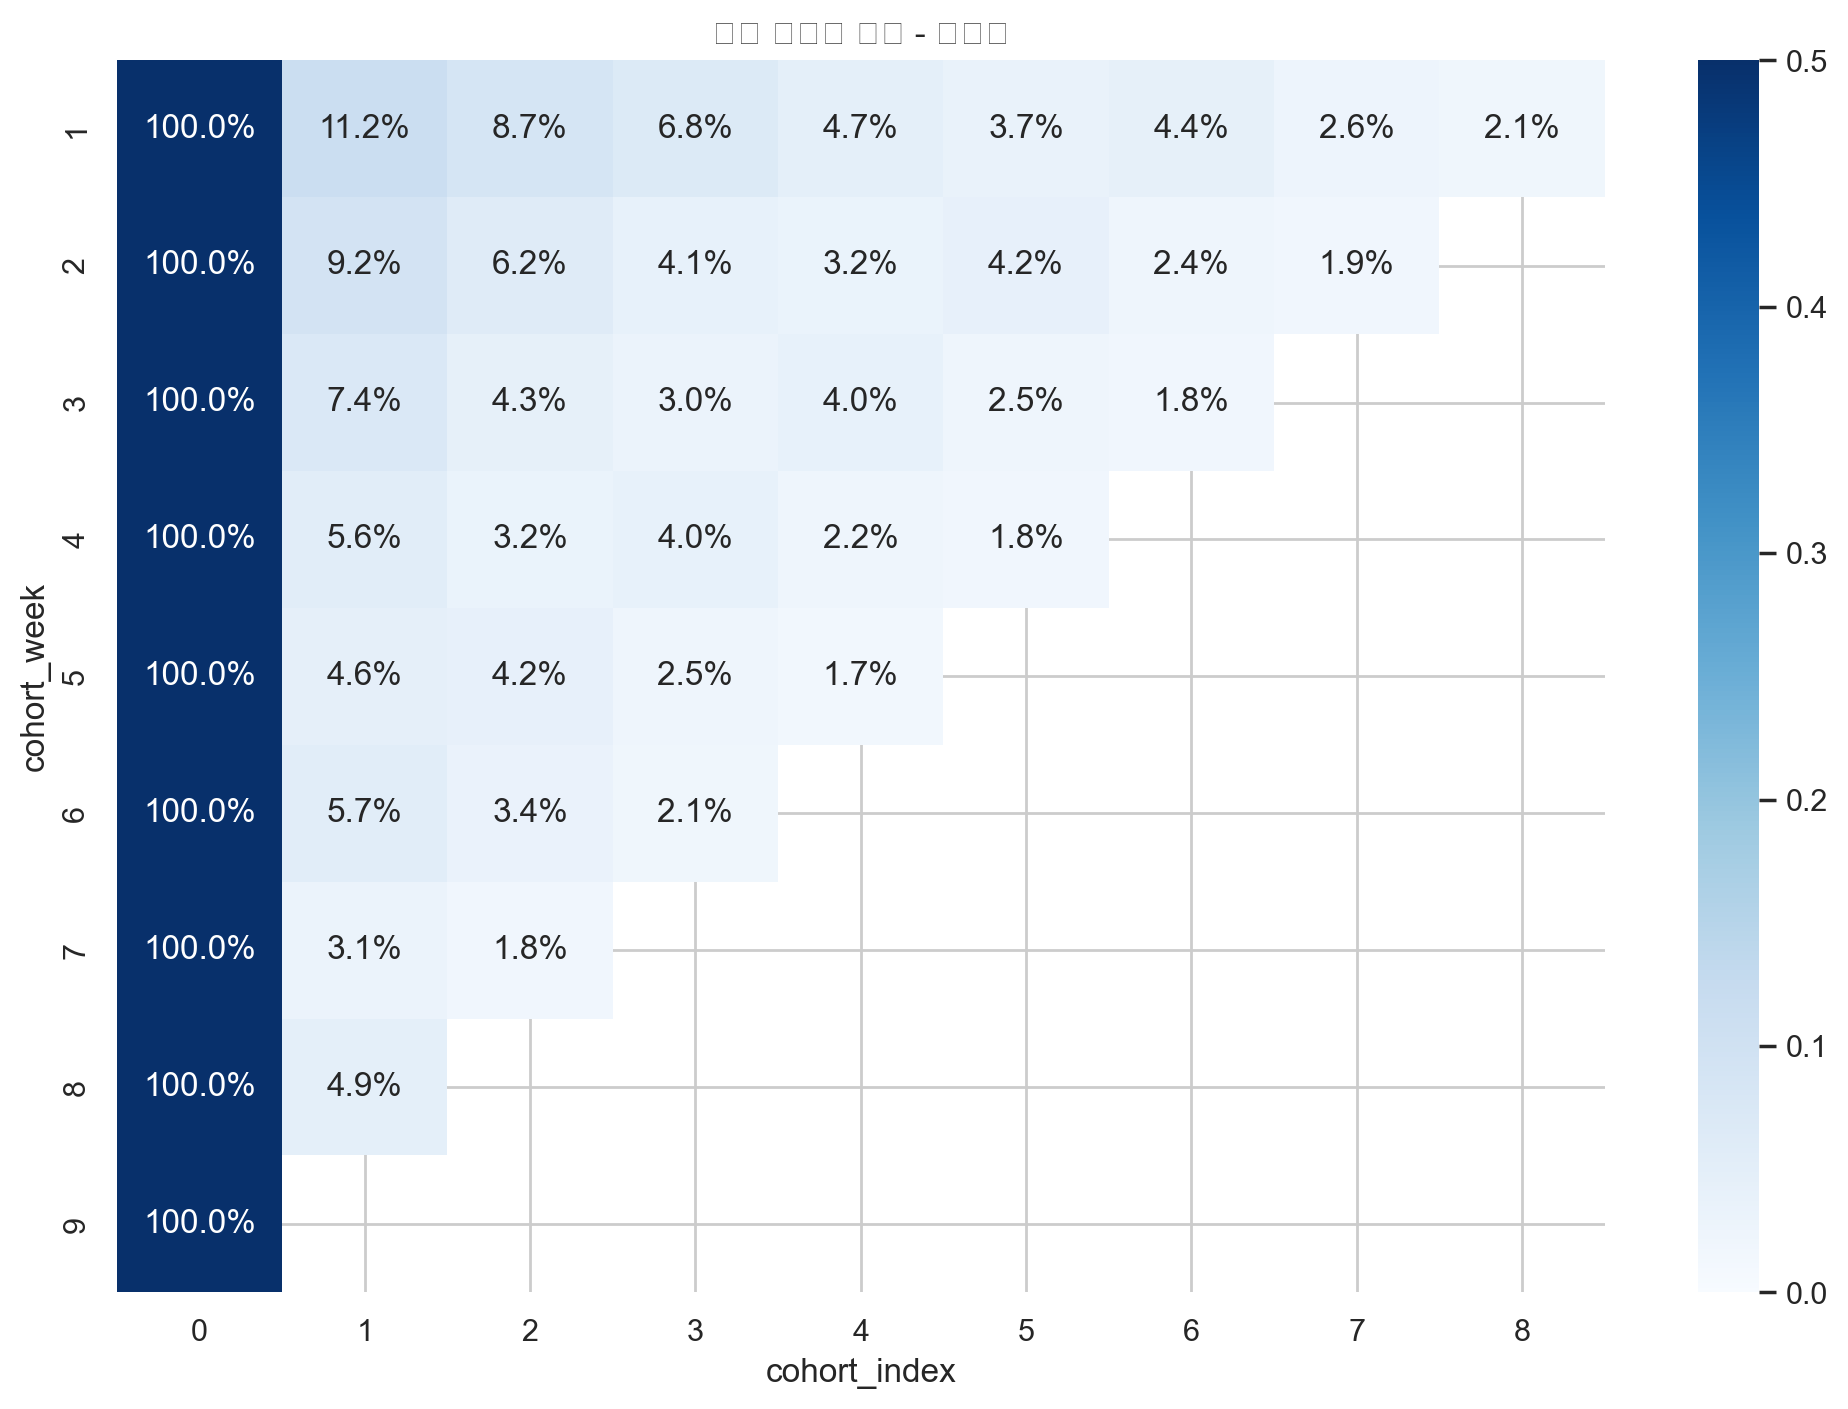

In [153]:
plt.figure(figsize=(12, 8))
plt.title('주간 코호트 분석 - 구매율')
sns.heatmap(data=retention_matrix,
            annot=True,
            fmt='.1%',
            vmin=0.0,
            vmax=0.5,
            cmap='Blues')
plt.show()

### 월별 코호트 빈도수

In [154]:
df_p_valid['YearDiff'] = df_p_valid['YMD'].dt.year - df_p_valid['YMDMin'].dt.year
df_p_valid['MonthDiff'] = df_p_valid['YMD'].dt.month - df_p_valid['YMDMin'].dt.month

In [155]:
df_p_valid["CohortIndex"] = (df_p_valid['YearDiff'] * 12) + df_p_valid['MonthDiff'] + 1

In [156]:
df_p_valid["CohortIndex"].value_counts()

1    287979
2     23109
Name: CohortIndex, dtype: int64

<Axes: xlabel='CohortIndex', ylabel='count'>

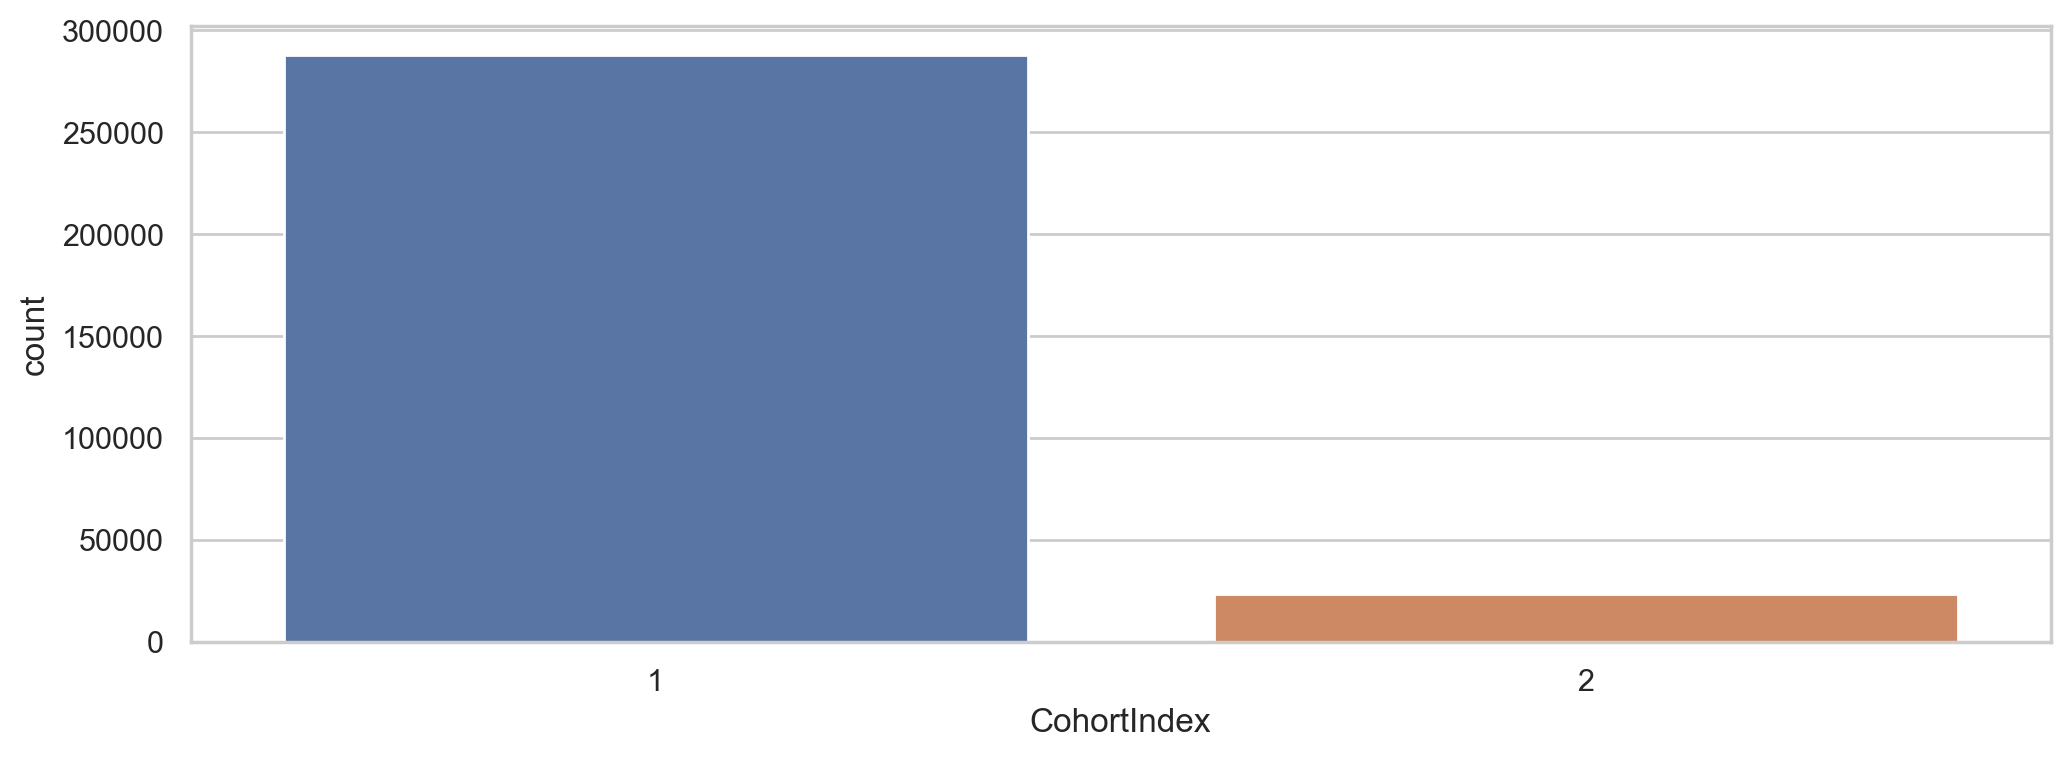

In [158]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_p_valid, x="CohortIndex")

### 코호트 일별 빈도수

In [159]:
cohort = df_p.groupby('user_id')['YMD'].min().reset_index()
cohort.columns = ['user_id', 'cohort_date']

In [160]:
df_p_day = pd.merge(df_p, cohort, on='user_id')
df_p_day['day_diff'] = (df_p_day['YMD'] - df_p_day['cohort_date']).dt.days

In [161]:
df_p_day['cohort_index'] = (df_p_day['day_diff'] + 1)

<Axes: xlabel='cohort_index', ylabel='count'>

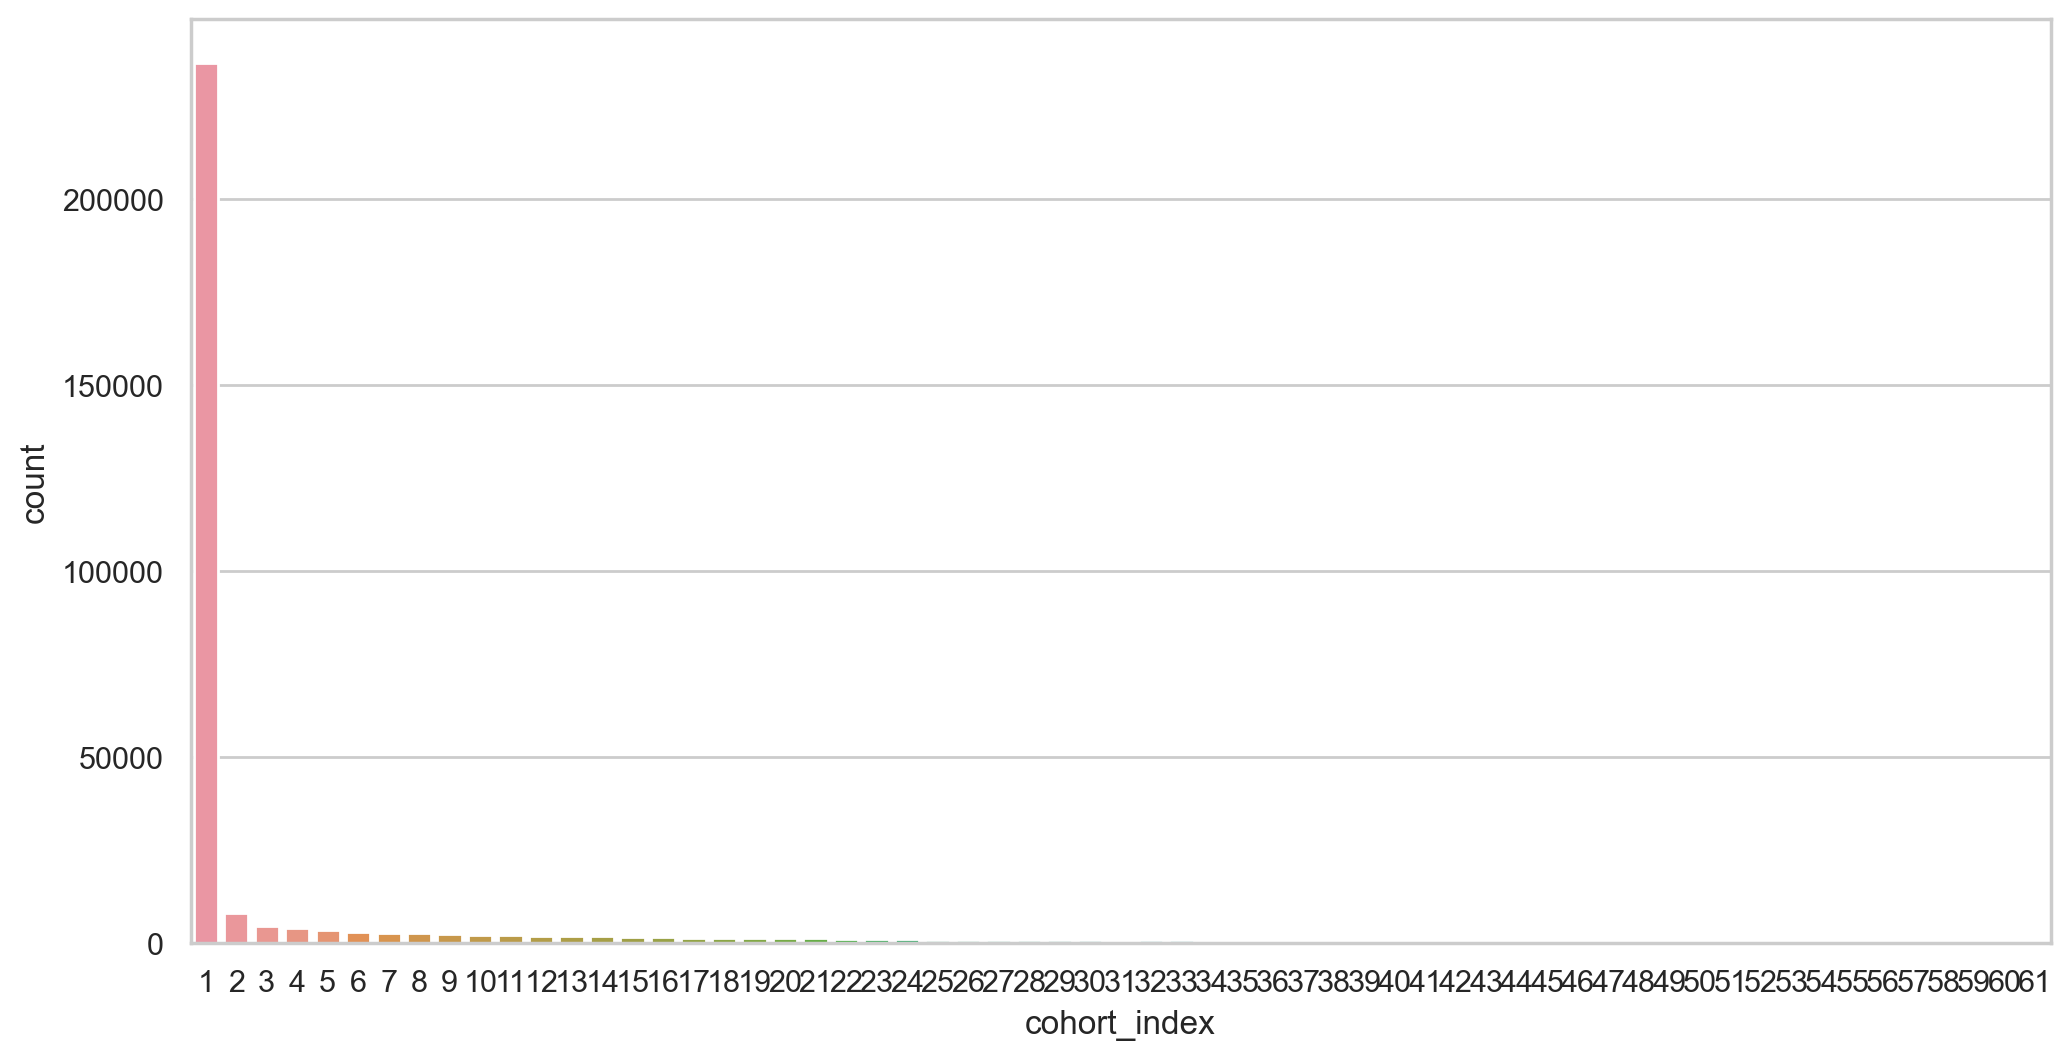

In [162]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_p_day, x='cohort_index')

In [163]:
df_p_2 = df_p[['YMD', 'cohort_index']]

In [164]:
cohort_counts = df_p_2.groupby(['YMD', 'cohort_index'])['cohort_index'].count().unstack()

In [165]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

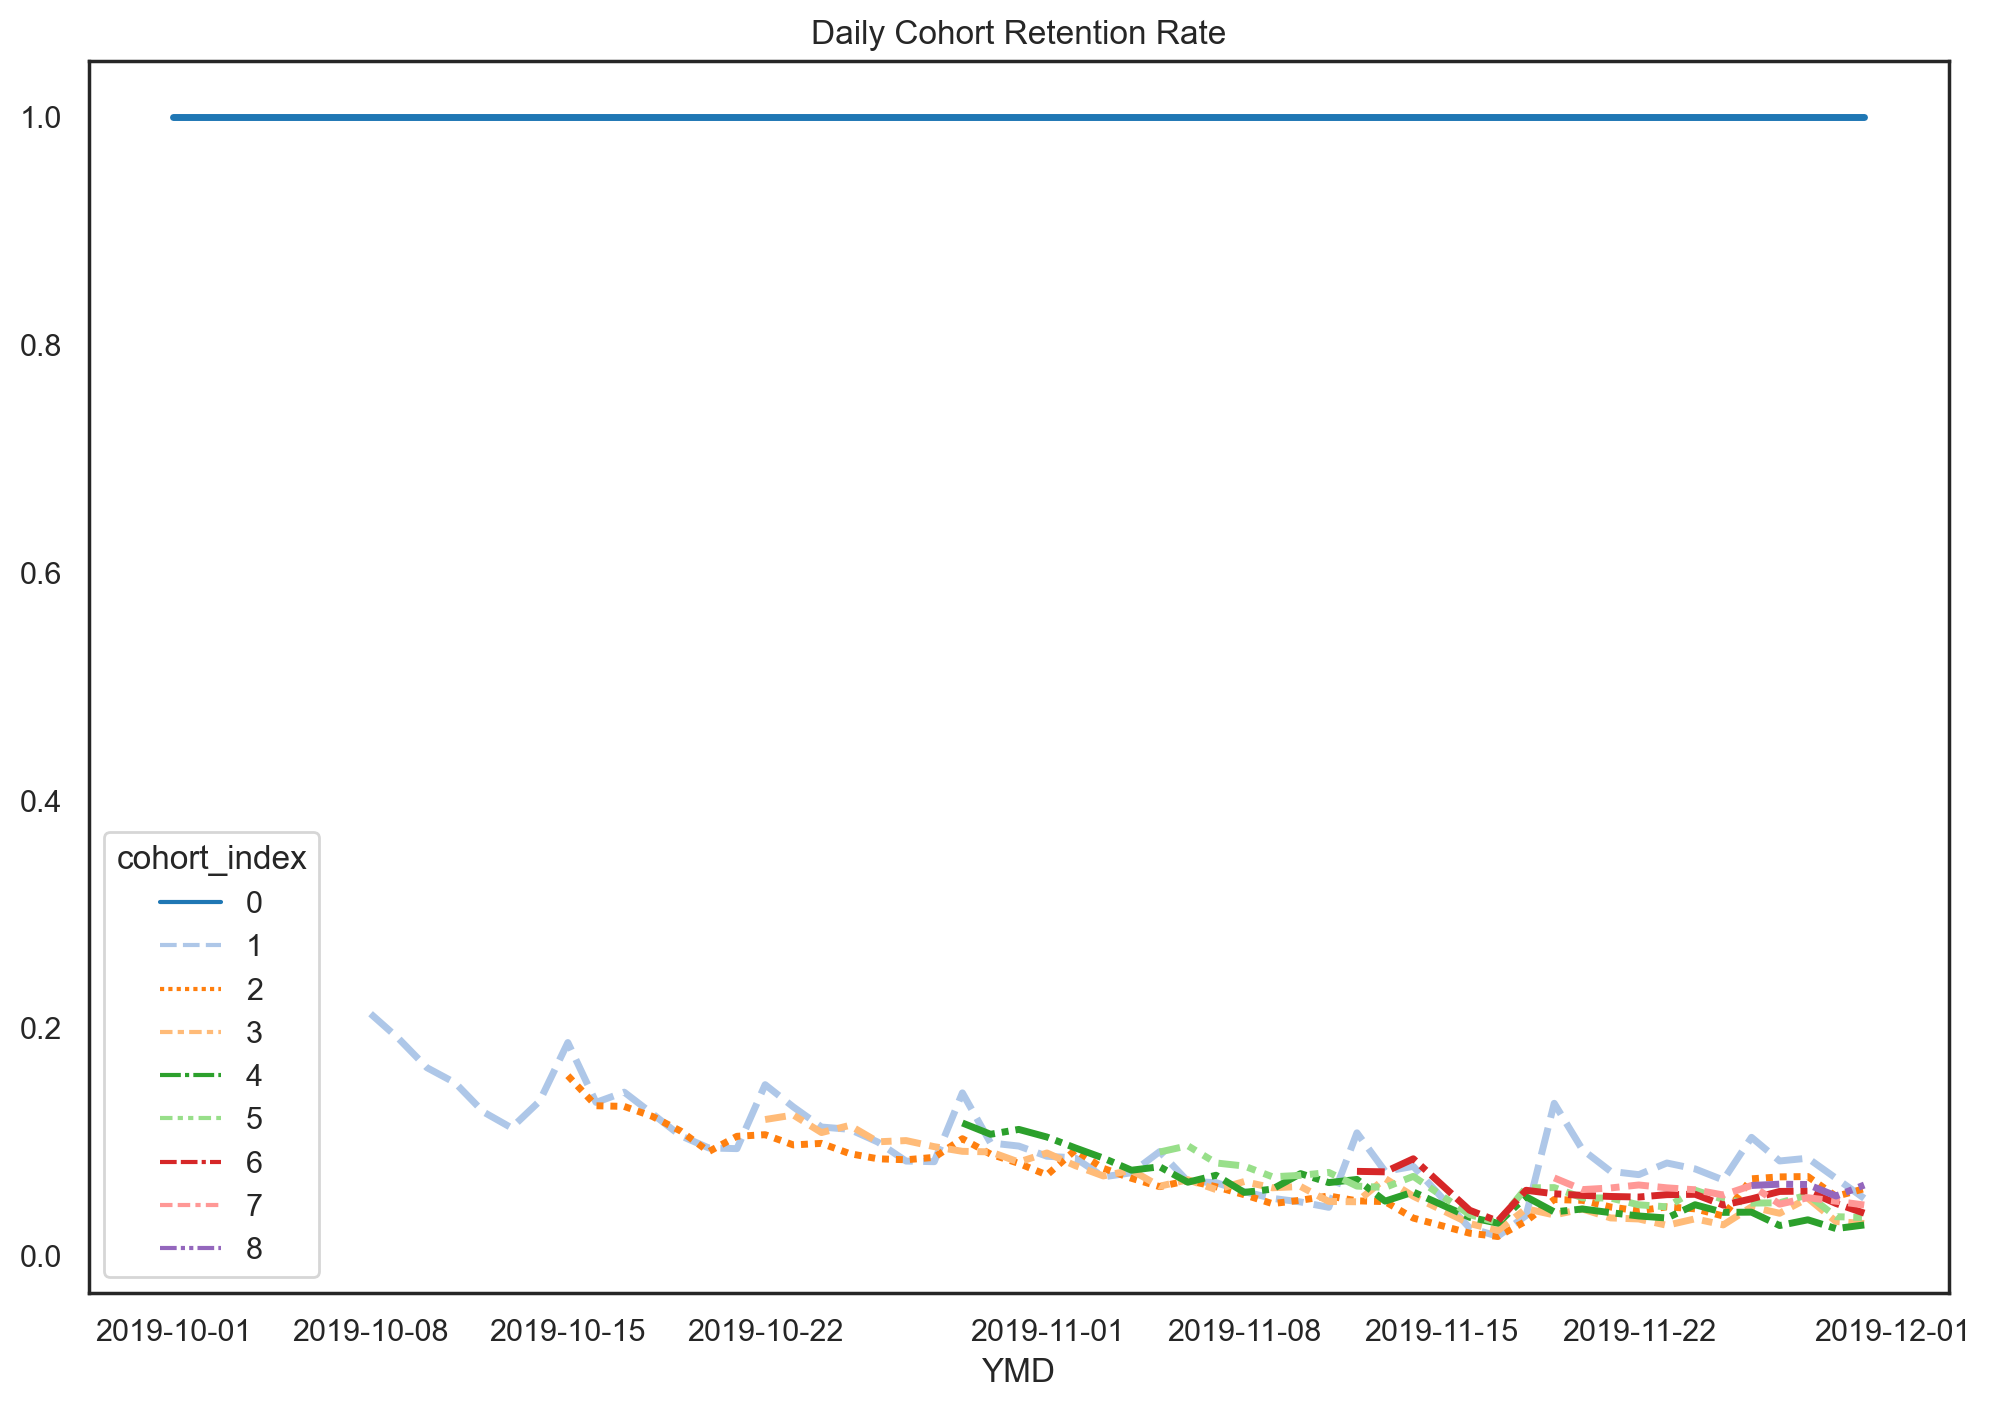

In [166]:
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Daily Cohort Retention Rate')
sns.lineplot(data=retention, palette='tab20', linewidth=2.5)
plt.show()

### 잔존 빈도 구하기
- 고객 유지 분석: 잔존빈도 데이터를 활용하여 고객의 재방문 빈도와 패턴을 파악할 수 있습니다. 이를 통해 고객이 얼마나 오래 이용하는지, 어떤 고객 그룹이 빠르게 탈퇴하는지, 어떤 고객 그룹이 장기간 이용하는지 등을 파악할 수 있습니다.

- 서비스 개선 분석: 잔존빈도 데이터는 서비스 개선 분석에도 활용될 수 있습니다. 고객이 재방문하는 이유를 파악하고, 이를 기반으로 서비스 개선이나 추가 기능 개발을 수행할 수 있습니다.

- 마케팅 분석: 잔존빈도 데이터는 마케팅 분석에도 활용될 수 있습니다. 특정 마케팅 캠페인에 대해 새로 유입된 고객을 기준으로, 그룹별로 몇 번 재방문하는지 측정하여 해당 캠페인의 효과를 분석할 수 있습니다.

- 수익성 분석: 잔존빈도 데이터는 수익성 분석에도 활용될 수 있습니다. 고객 그룹별로 재방문 빈도와 구매 금액을 파악하여, 해당 고객 그룹이 전체 매출에서 어느 정도의 비중을 차지하는지 파악할 수 있습니다. 이를 통해, 수익성이 높은 고객 그룹을 파악하고 해당 그룹에 집중적인 마케팅 또는 서비스 개발을 수행할 수 있습니다.

In [167]:
cohort_count = df_p.groupby(['cohort_week', 'cohort_index'])["user_id"].nunique().unstack()

In [168]:
cohort_count.index = cohort_count.index.astype(str).str[:7]

<Axes: xlabel='cohort_index', ylabel='cohort_week'>

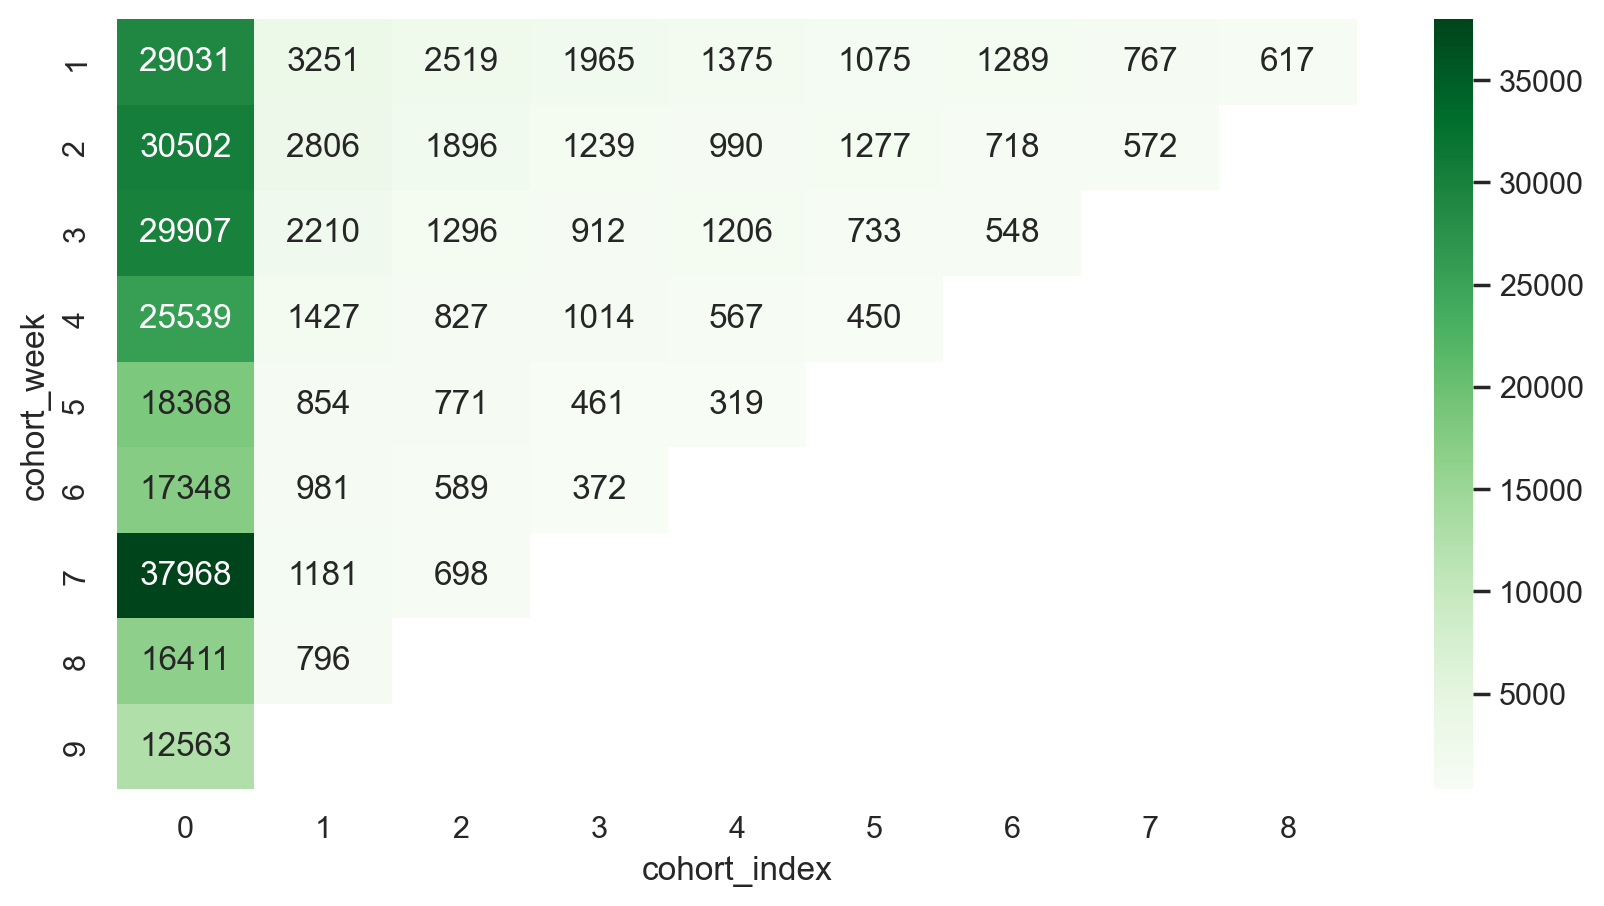

In [169]:
plt.figure(figsize=(10, 5))
sns.heatmap(cohort_count, cmap="Greens", annot=True, fmt=".0f")

### 주별 신규 유입 고객 수

In [170]:
cohort_count[1]

cohort_week
1    3251.0
2    2806.0
3    2210.0
4    1427.0
5     854.0
6     981.0
7    1181.0
8     796.0
9       NaN
Name: 1, dtype: float64

<Axes: xlabel='cohort_week'>

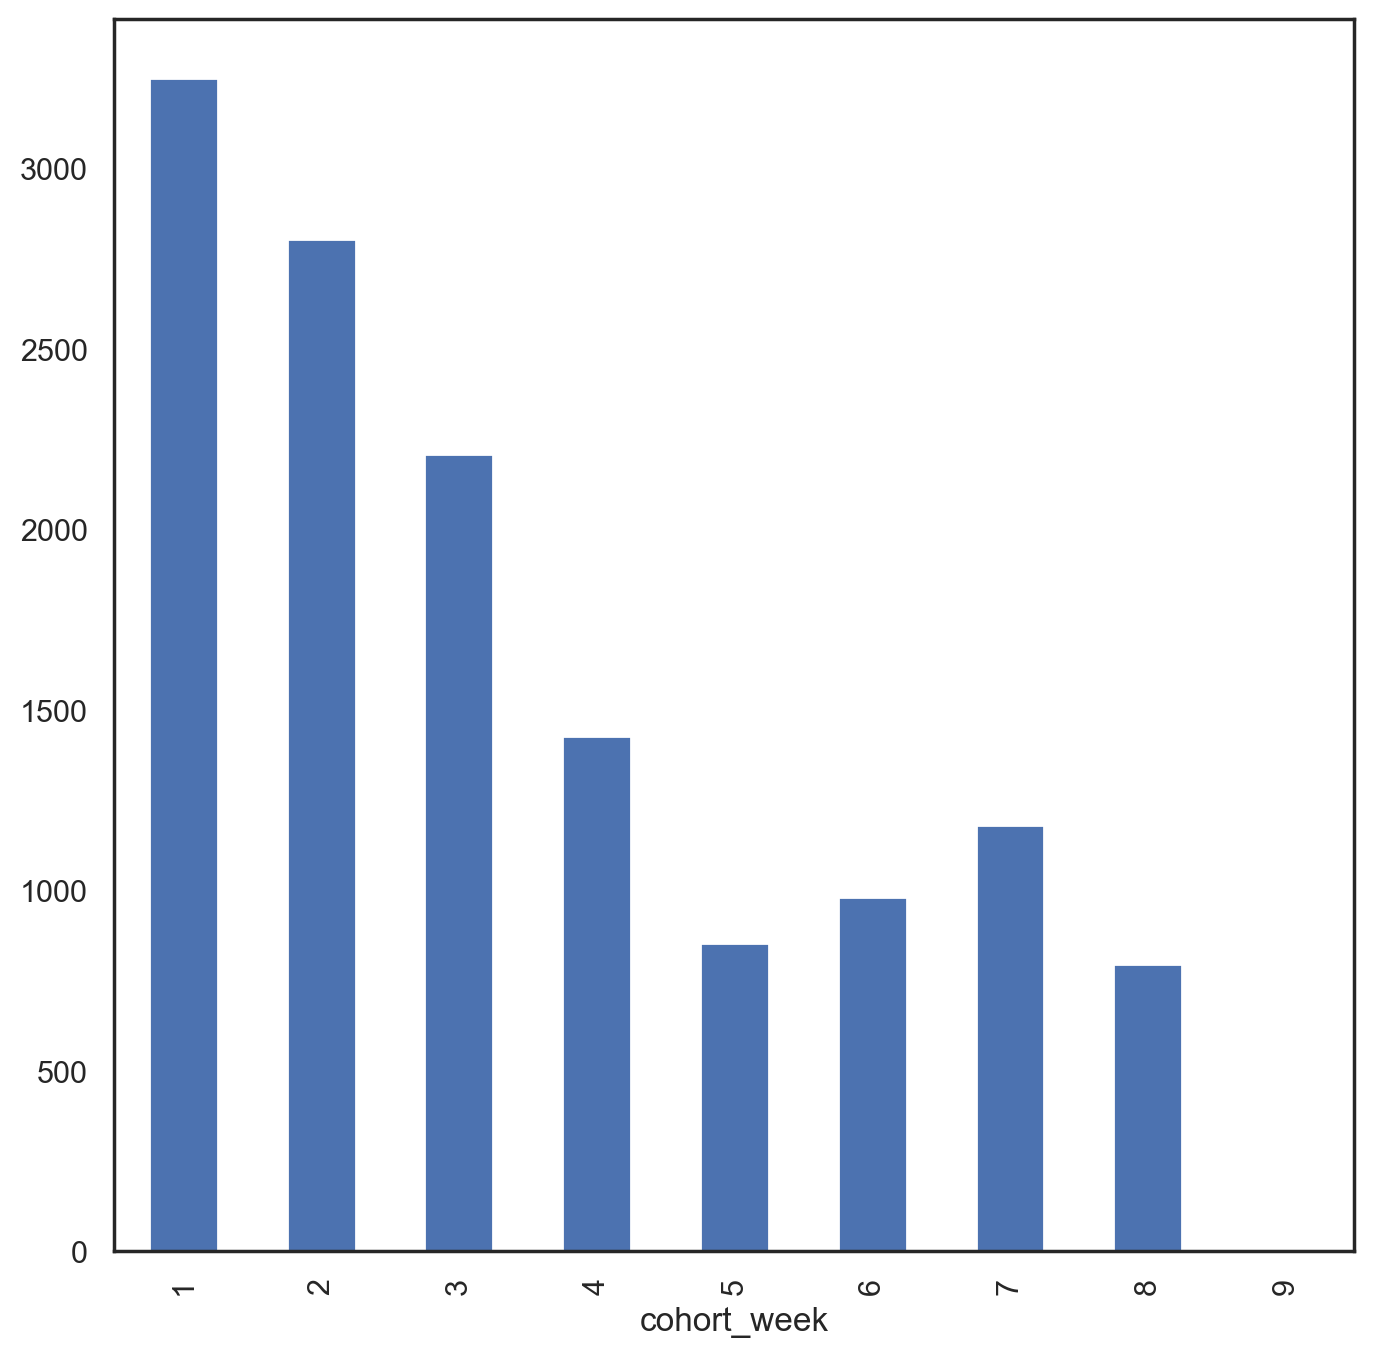

In [171]:
cohort_count[1].plot.bar()

### 잔존율 구하기

In [172]:
cohort_norm = cohort_count.div(cohort_count[1], axis=0).round(2)

<Axes: xlabel='cohort_index', ylabel='cohort_week'>

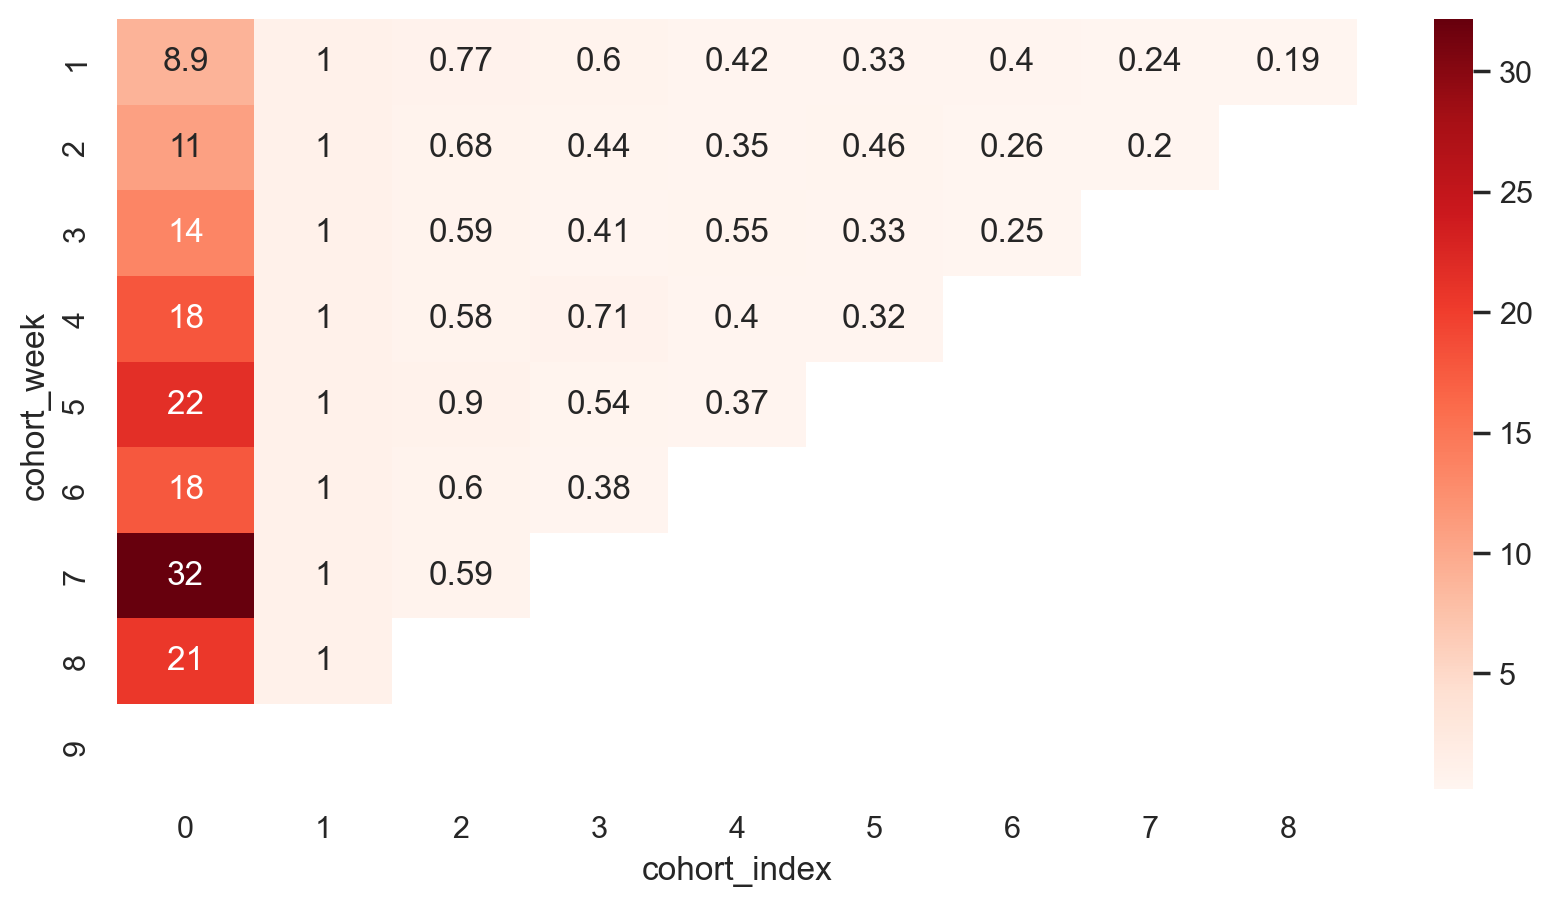

In [173]:
plt.figure(figsize=(10, 5))
sns.heatmap(cohort_norm, cmap="Reds", annot=True)

### RFM 분석
Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?

Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?

Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?

In [174]:
df_p_valid = df_p_valid.drop_duplicates()
df_p_valid.shape

(311083, 20)

In [175]:
last_timestamp = df_p_valid["event_time"].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-12-01 23:52:27+0000', tz='UTC')

In [176]:
(last_timestamp - df_p_valid.iloc[0]["event_time"]).days

61

In [177]:
def find_recency(x):
    """최근 마지막 거래일과 해당 고객의 마지막 거래일의 차이를 구합니다."""
    return (last_timestamp - x.max()).days

find_recency(df_p_valid["event_time"][:1000])

30

In [178]:
rfm = df_p_valid.groupby("user_id").agg({"event_time" : lambda x : (last_timestamp - x.max()).days,
                                    "user_id" : "count", 
                                    "price": "sum"})
rfm.head(3)

,event_time,user_id,price
user_id,,,
138340325,20,1,93.50
264649825,56,2,1240.04
296197073,1,1,51.46


In [179]:
rfm.rename(columns={"event_time":"Recency"}, inplace=True)
rfm.rename(columns={"user_id":"Frequency"}, inplace=True)
rfm.rename(columns={"price":"MonetaryValue"}, inplace=True)

In [180]:
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
138340325,20,1,93.50
264649825,56,2,1240.04
296197073,1,1,51.46
304707635,18,1,2007.52
307138432,23,1,106.57
...,...,...,...
579930533,1,1,227.64
579938391,1,1,181.21
579939979,1,1,321.73


In [181]:
r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 3))
m_labels = list(range(1, 6))
cut_size = 5

In [182]:
r_cut = pd.qcut(rfm["Recency"], cut_size, labels=r_labels, duplicates='drop')
f_cut = pd.qcut(rfm["Frequency"], cut_size, labels=f_labels, duplicates='drop')
m_cut = pd.qcut(rfm["MonetaryValue"], cut_size, labels=m_labels, duplicates='drop')

In [183]:
rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
138340325,20,1,93.50,4,1,2
264649825,56,2,1240.04,1,1,5
296197073,1,1,51.46,5,1,1
304707635,18,1,2007.52,4,1,5
307138432,23,1,106.57,4,1,2
...,...,...,...,...,...,...
579930533,1,1,227.64,5,1,3
579938391,1,1,181.21,5,1,3
579939979,1,1,321.73,5,1,4


- 타겟 마케팅: RFM 분석 결과를 바탕으로 고객 그룹을 나누고, 각 그룹에 맞는 마케팅 전략을 세울 수 있습니다. 예를 들어, 고객의 Recency와 Frequency 점수가 높지만 Monetary 점수가 낮은 그룹은 할인 이벤트나 쿠폰을 제공하여 재구매를 유도할 수 있습니다.

- 고객 이탈 예측: RFM 분석 결과를 바탕으로 최근 구매일자, 구매 빈도, 구매 금액 등을 고려하여 고객의 이탈 가능성을 예측할 수 있습니다. 이를 통해 이탈 가능성이 높은 고객에게 타겟 마케팅을 진행하여 이탈을 막을 수 있습니다.

- 상품 추천: 고객의 RFM Segment나 RFM Class에 따라 상품 추천을 제공할 수 있습니다. 예를 들어, Monetary 점수가 높은 고객에게는 고가 상품을 추천하거나, Frequency 점수가 높은 고객에게는 구매 빈도가 높은 제품을 추천할 수 있습니다.

- 수익 예측: 고객의 RFM Segment나 RFM Class를 분석하여 해당 그룹의 평균 구매 금액이나 구매 빈도 등을 파악하여 수익을 예측할 수 있습니다. 이를 통해 마케팅 예산을 효율적으로 분배하거나, 비즈니스 전략을 세울 수 있습니다.

### rfm segment
: RFM 요소를 기반으로 고객을 분류한 뒤, 각각의 조합에 해당하는 Segment를 만들어 분석하는 방법입니다

In [184]:
rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

### rfm score
: RFM 요소들의 범위를 정하여 각각의 요소에 대한 값에 따라 숫자 혹은 알파벳 등의 Class로 분류하는 방법입니다.

In [185]:
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
138340325,20,1,93.50,4,1,2,412,7
264649825,56,2,1240.04,1,1,5,115,7


<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

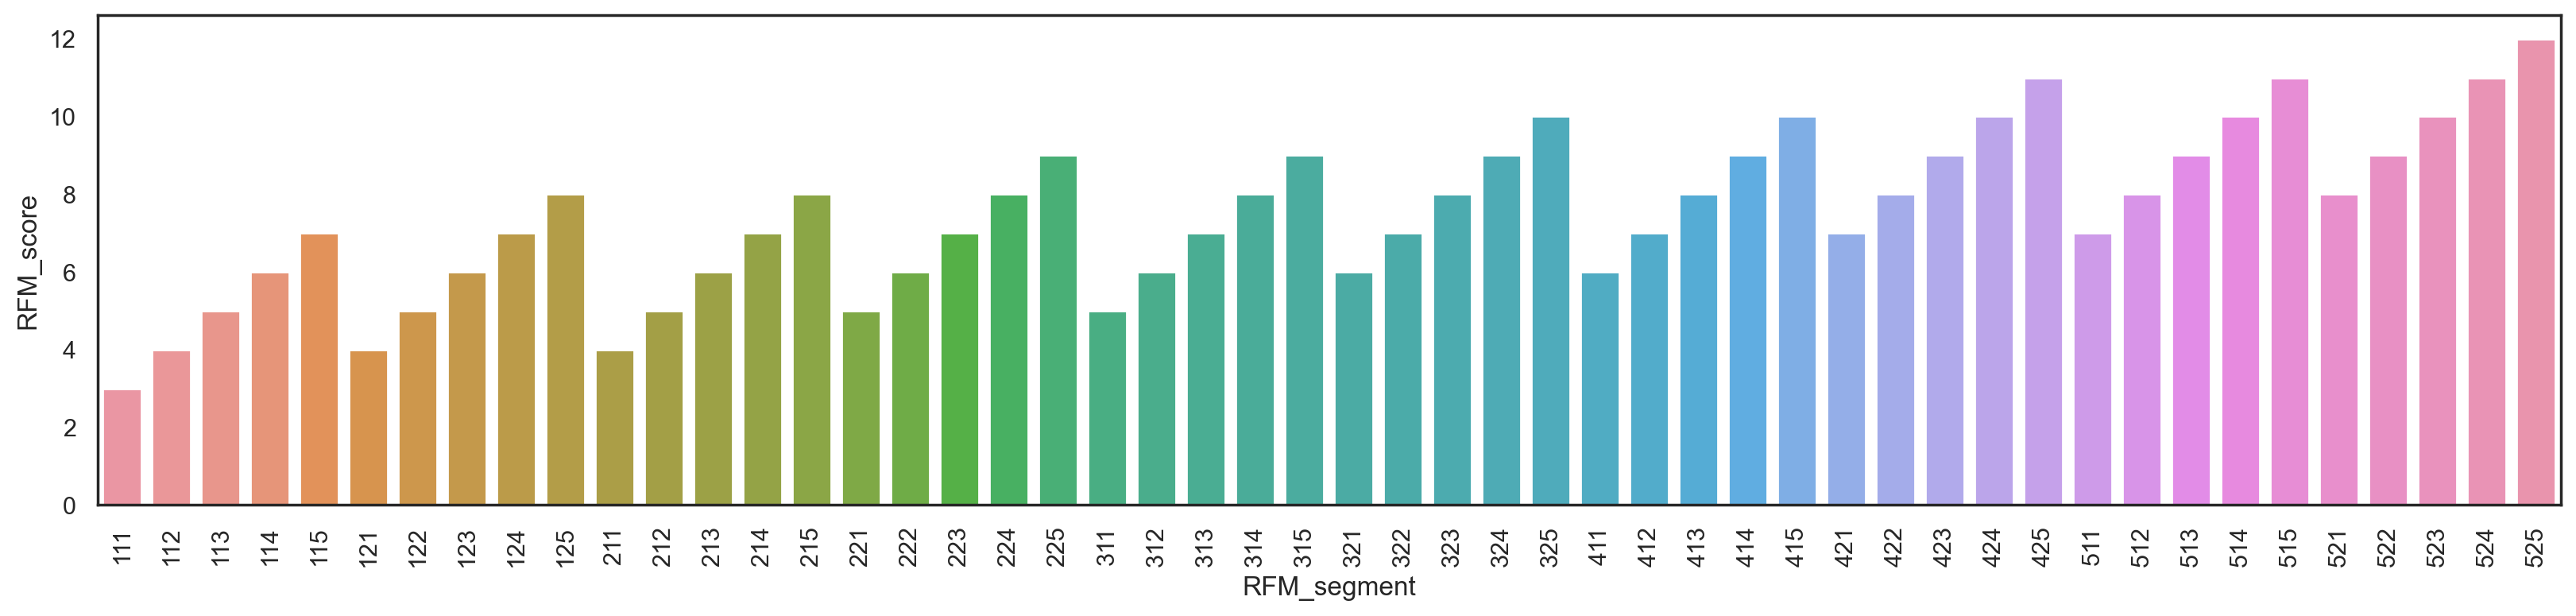

In [186]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

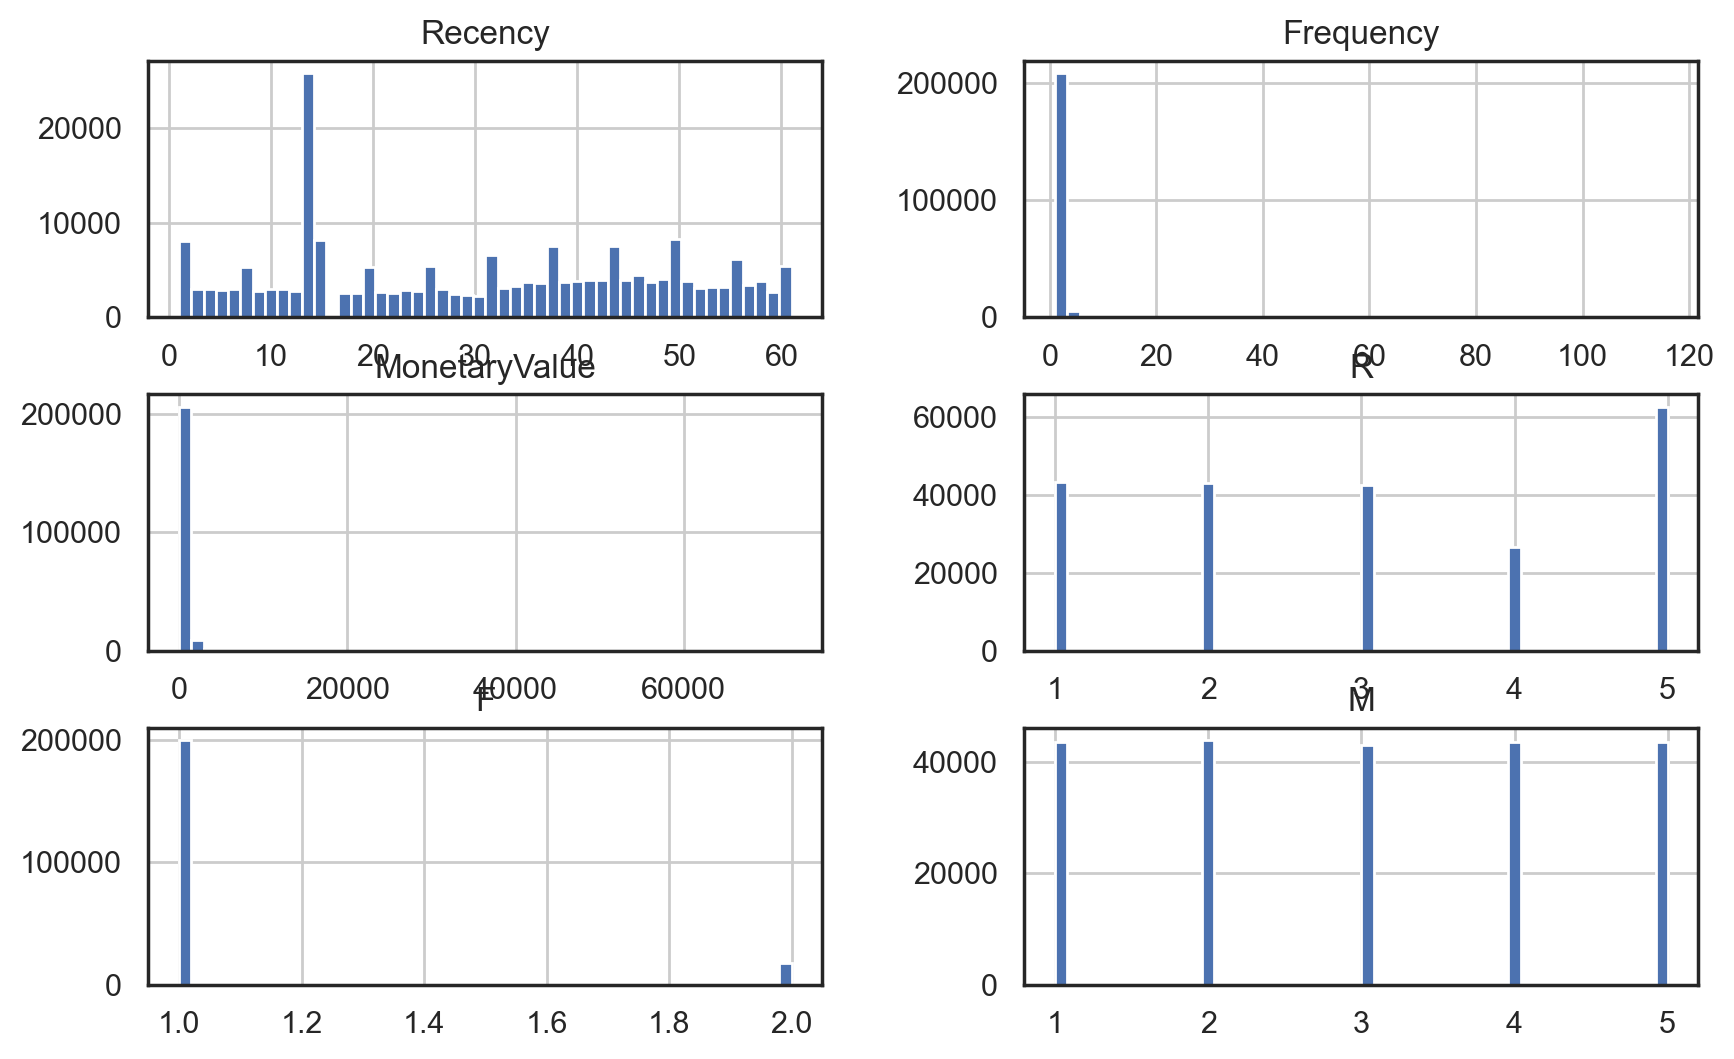

In [187]:
rfm.iloc[:, :-2].astype(float).hist(figsize=(10, 6), bins=50);

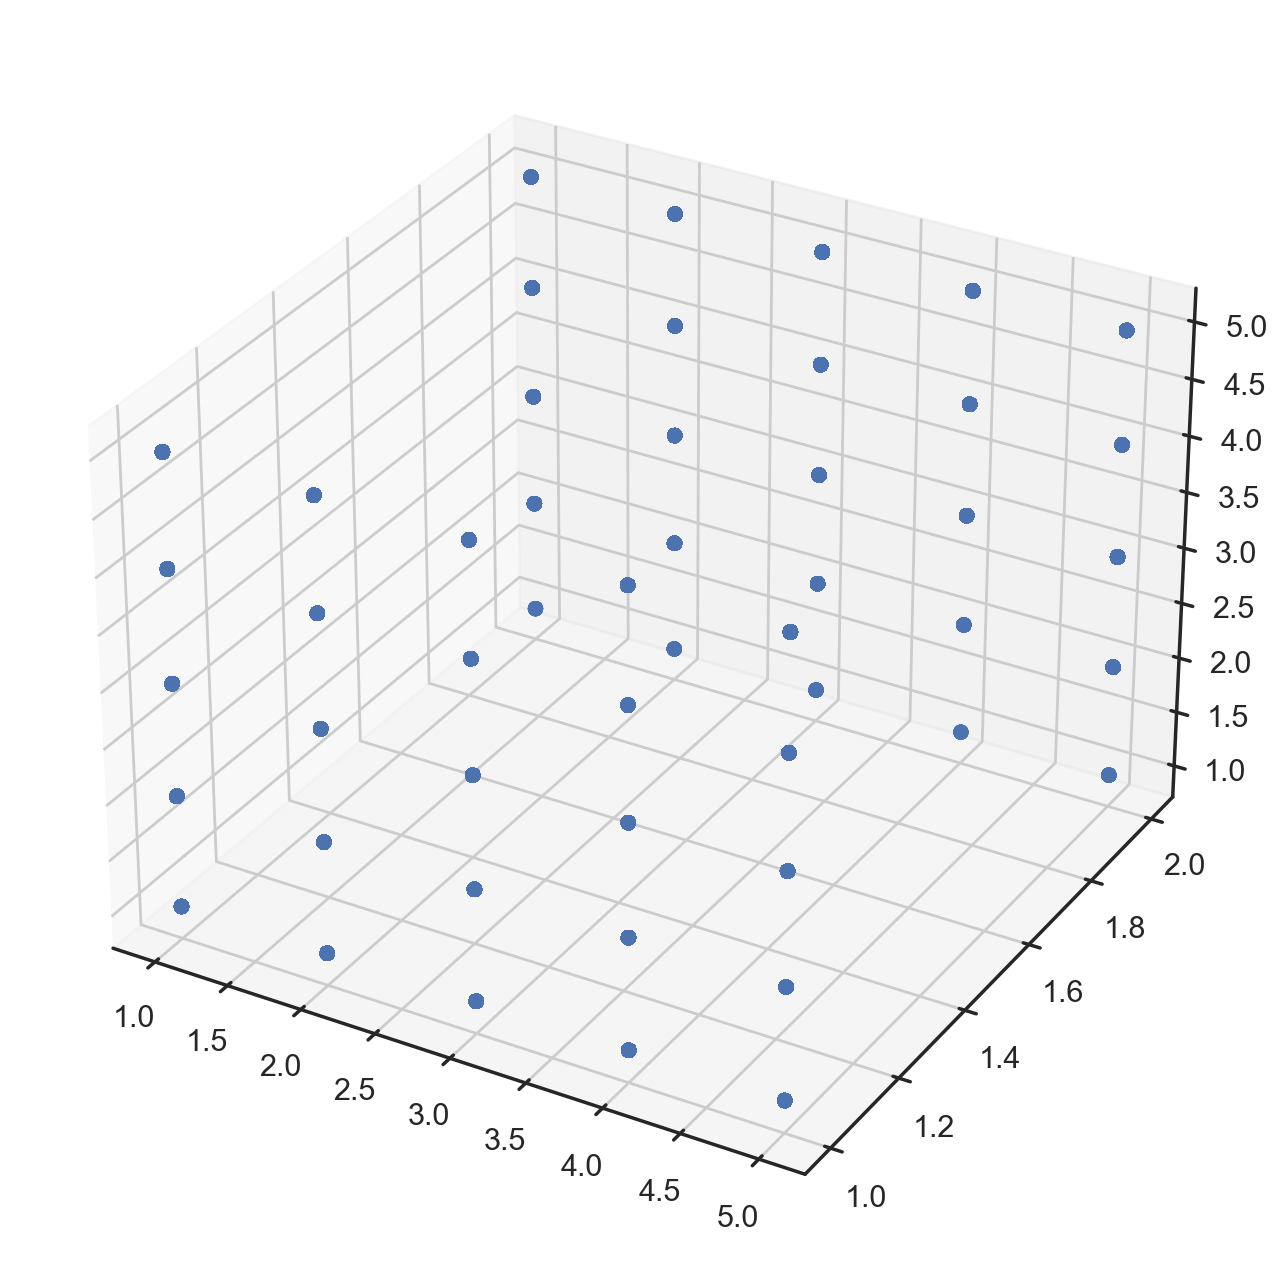

In [188]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["R"], rfm["F"], rfm["M"])

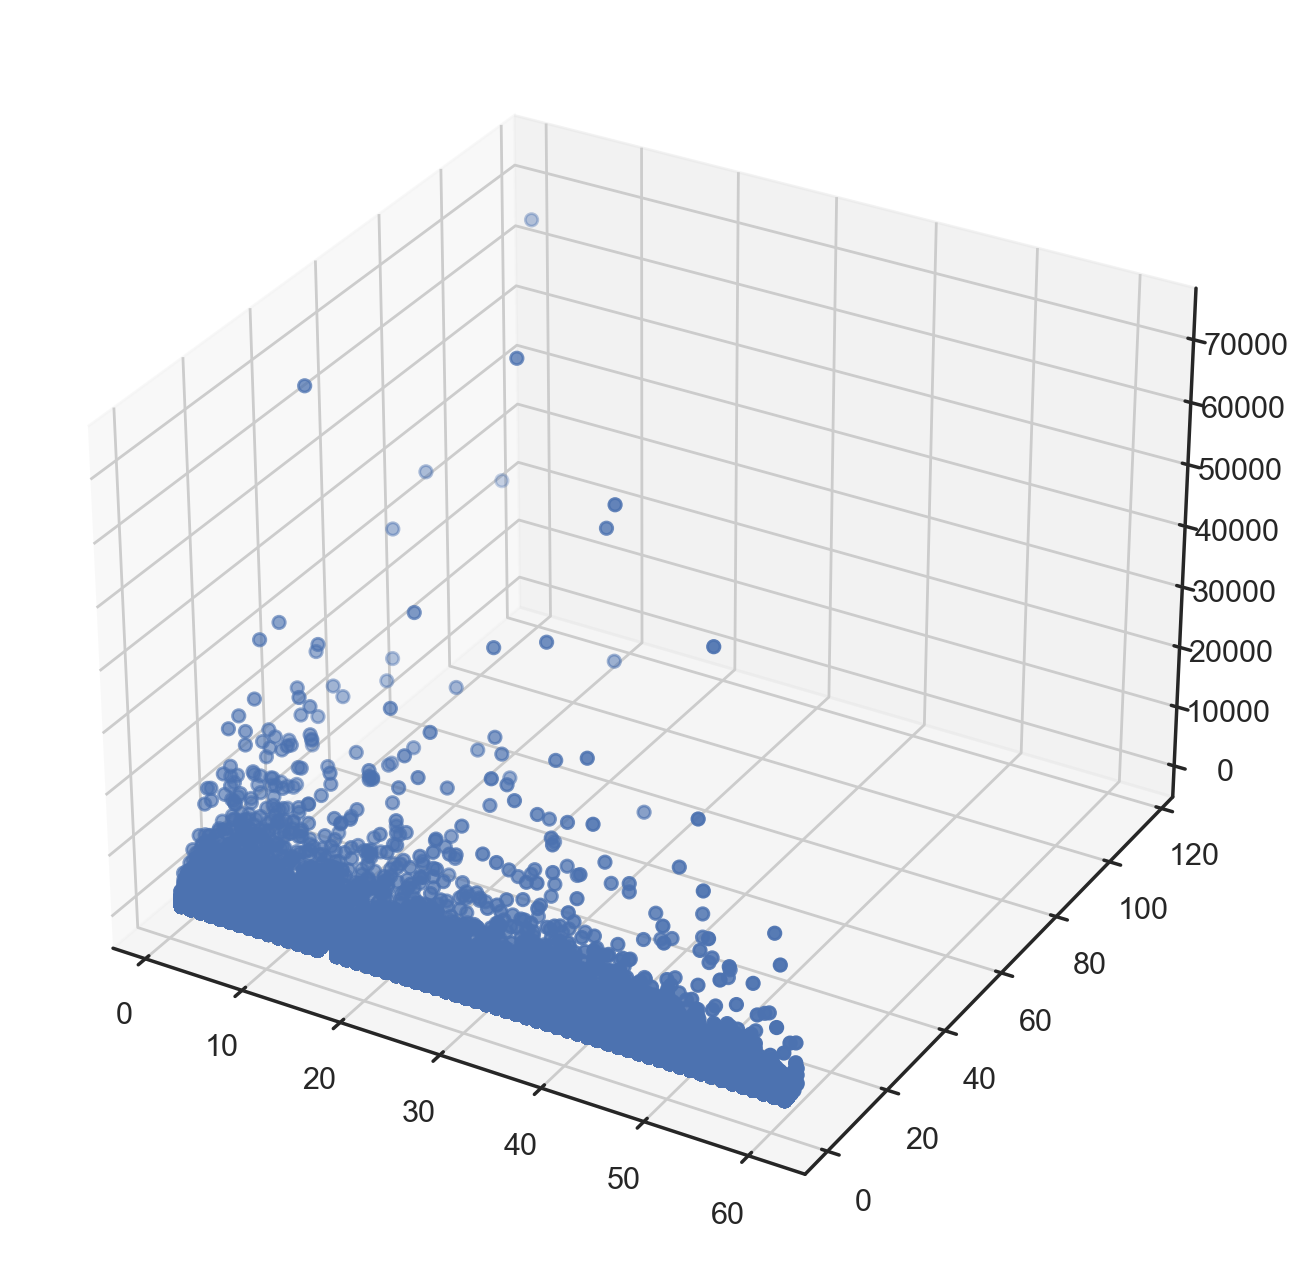

In [189]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"])

In [190]:
rfm.groupby("RFM_score").agg({"Recency": "mean", 
                              "Frequency" : "mean", 
                              "MonetaryValue" : ["mean", "sum"]
                             }).style.background_gradient().format("{:,.0f}")

In [221]:
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], 
                           q=4, 
                           labels=["lv1", "lv2", "lv3","lv4"])

In [222]:
rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
lv1,83568.0,4.908290,1.011636,3.0,4.0,5.0,6.0,6.0
lv2,39071.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0
lv3,59244.0,8.439910,0.496380,8.0,8.0,8.0,9.0,9.0
lv4,35754.0,10.610617,0.715180,10.0,10.0,10.0,11.0,12.0


### rfm class별 rfm score

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

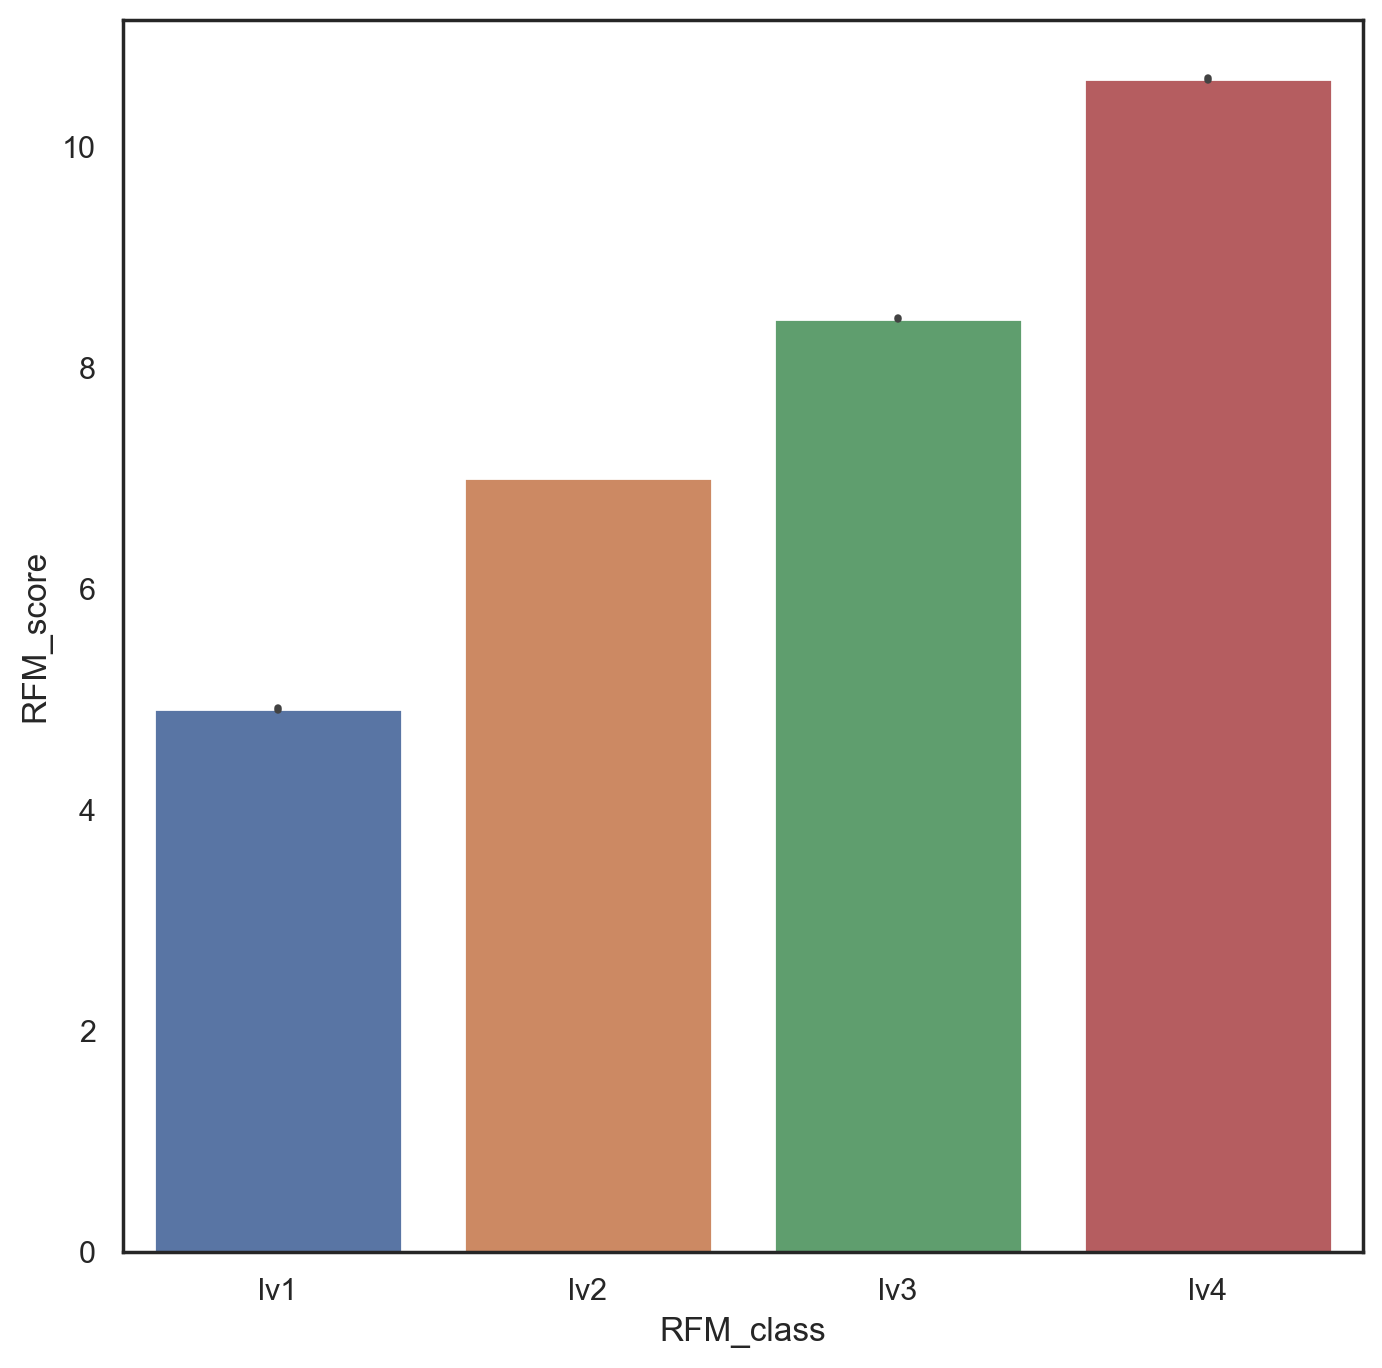

In [223]:
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

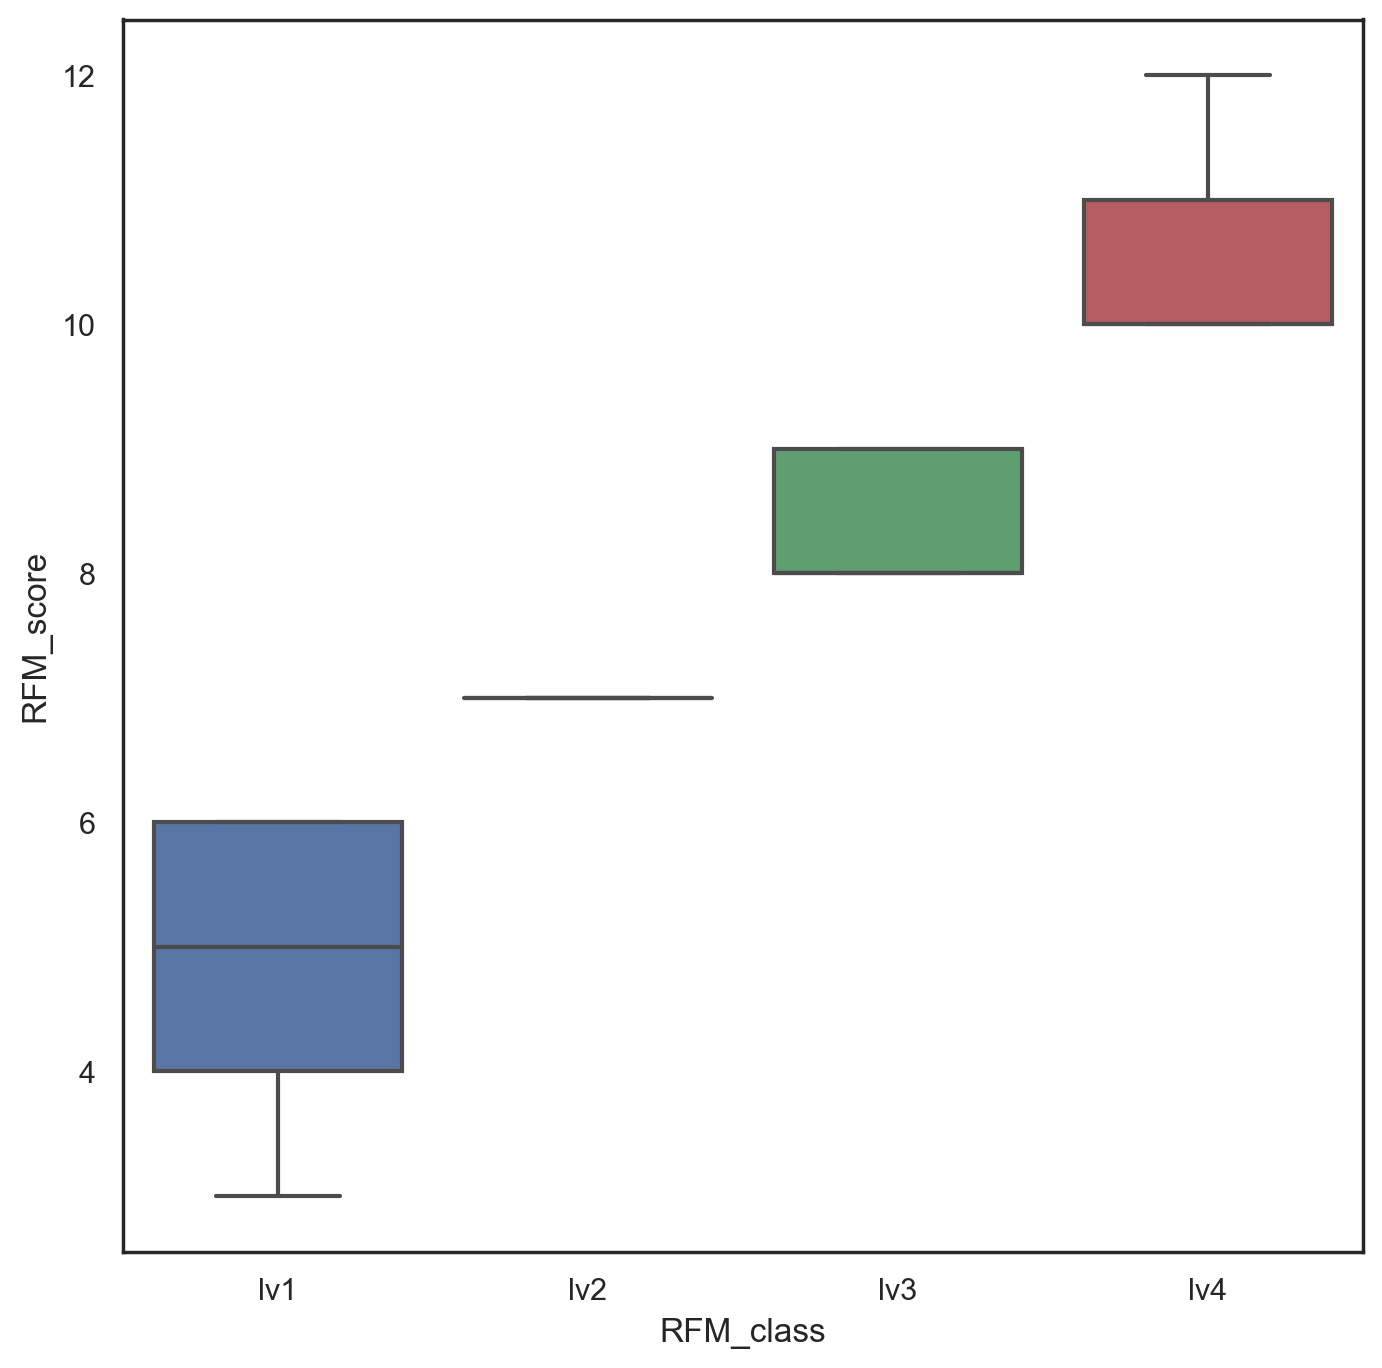

In [224]:
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

### 최근성

<Axes: xlabel='R', ylabel='RFM_score'>

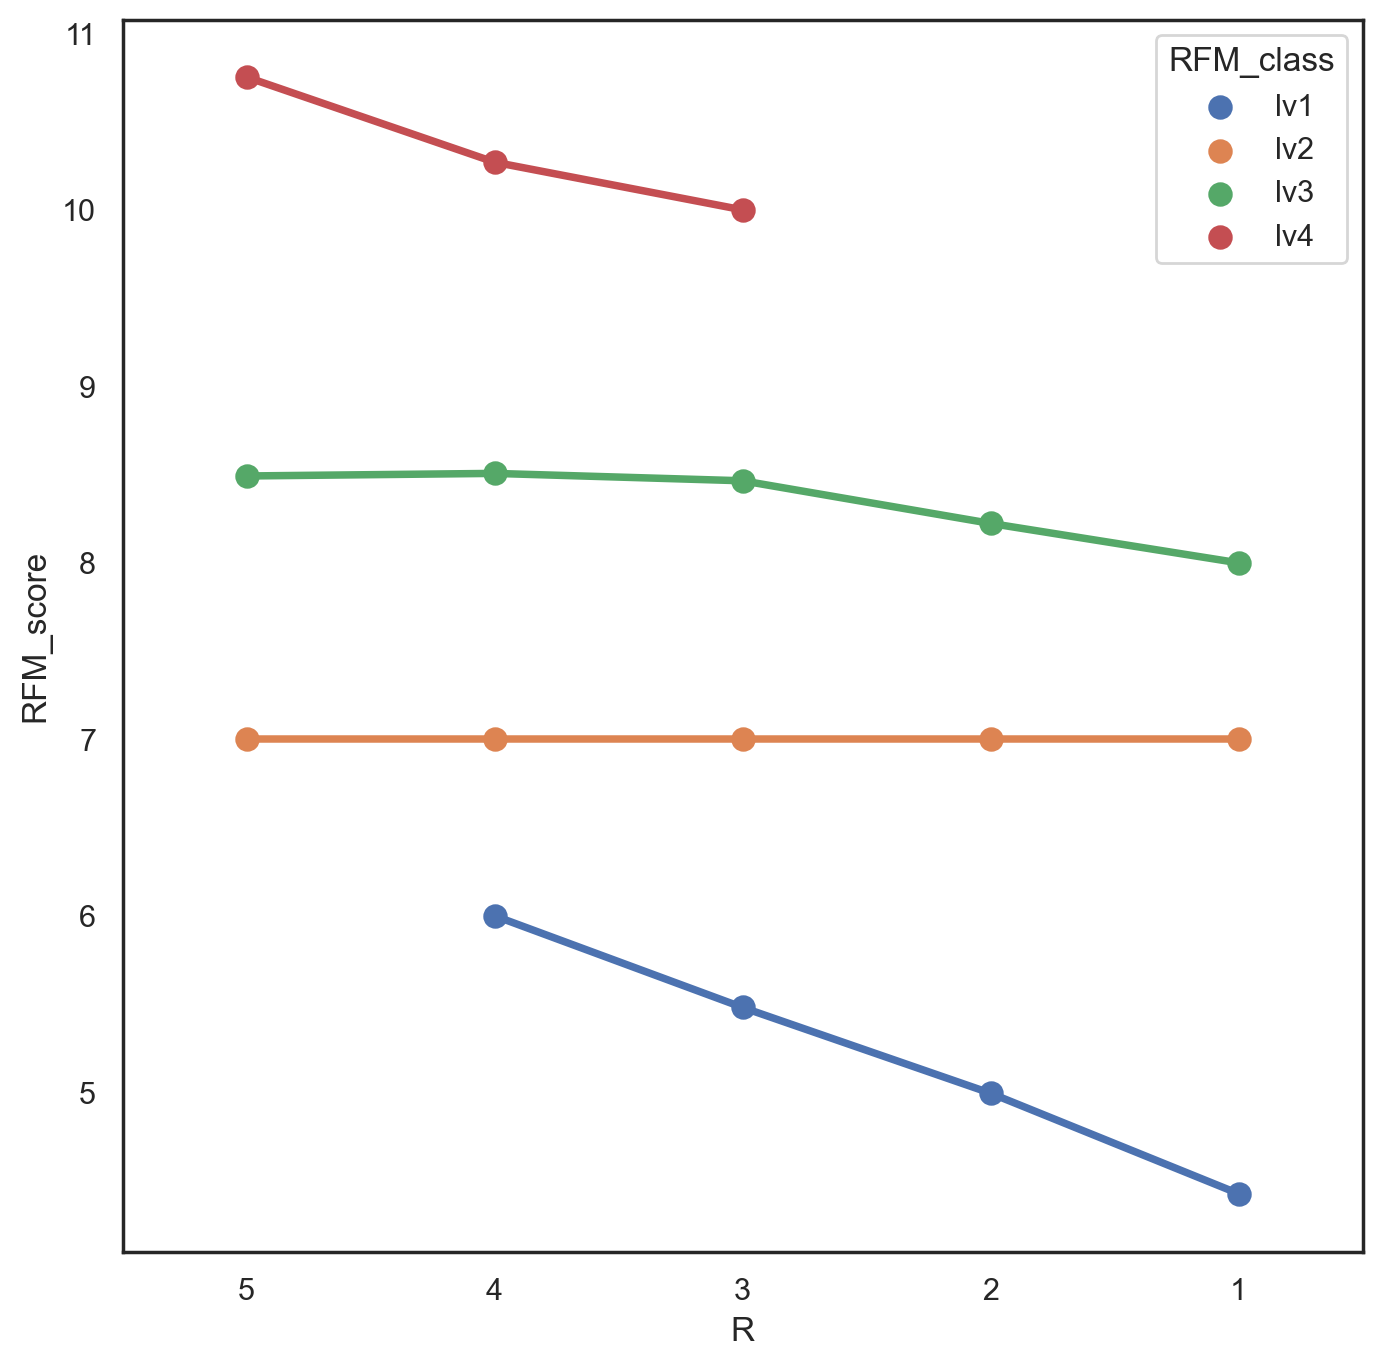

In [225]:
sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

### 빈도

<Axes: xlabel='F', ylabel='RFM_score'>

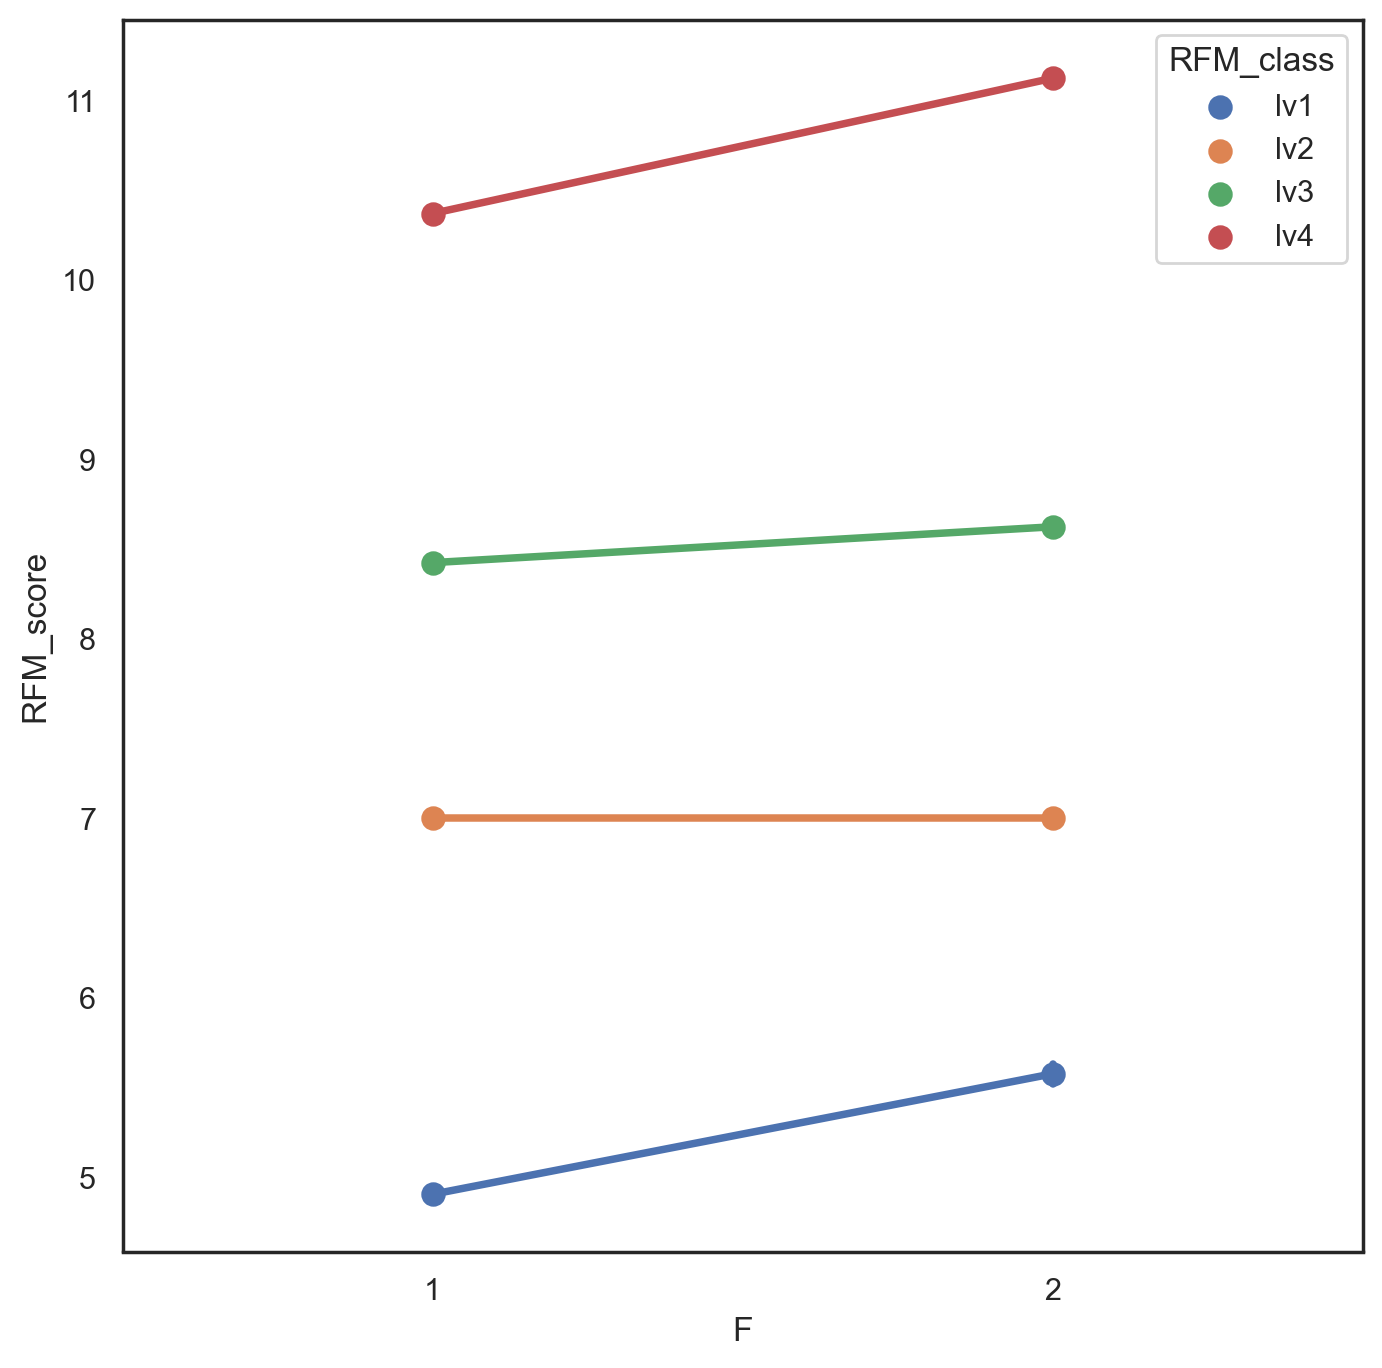

In [226]:
sns.pointplot(data=rfm, x="F", y="RFM_score", hue="RFM_class")

### 거래규모

<Axes: xlabel='M', ylabel='RFM_score'>

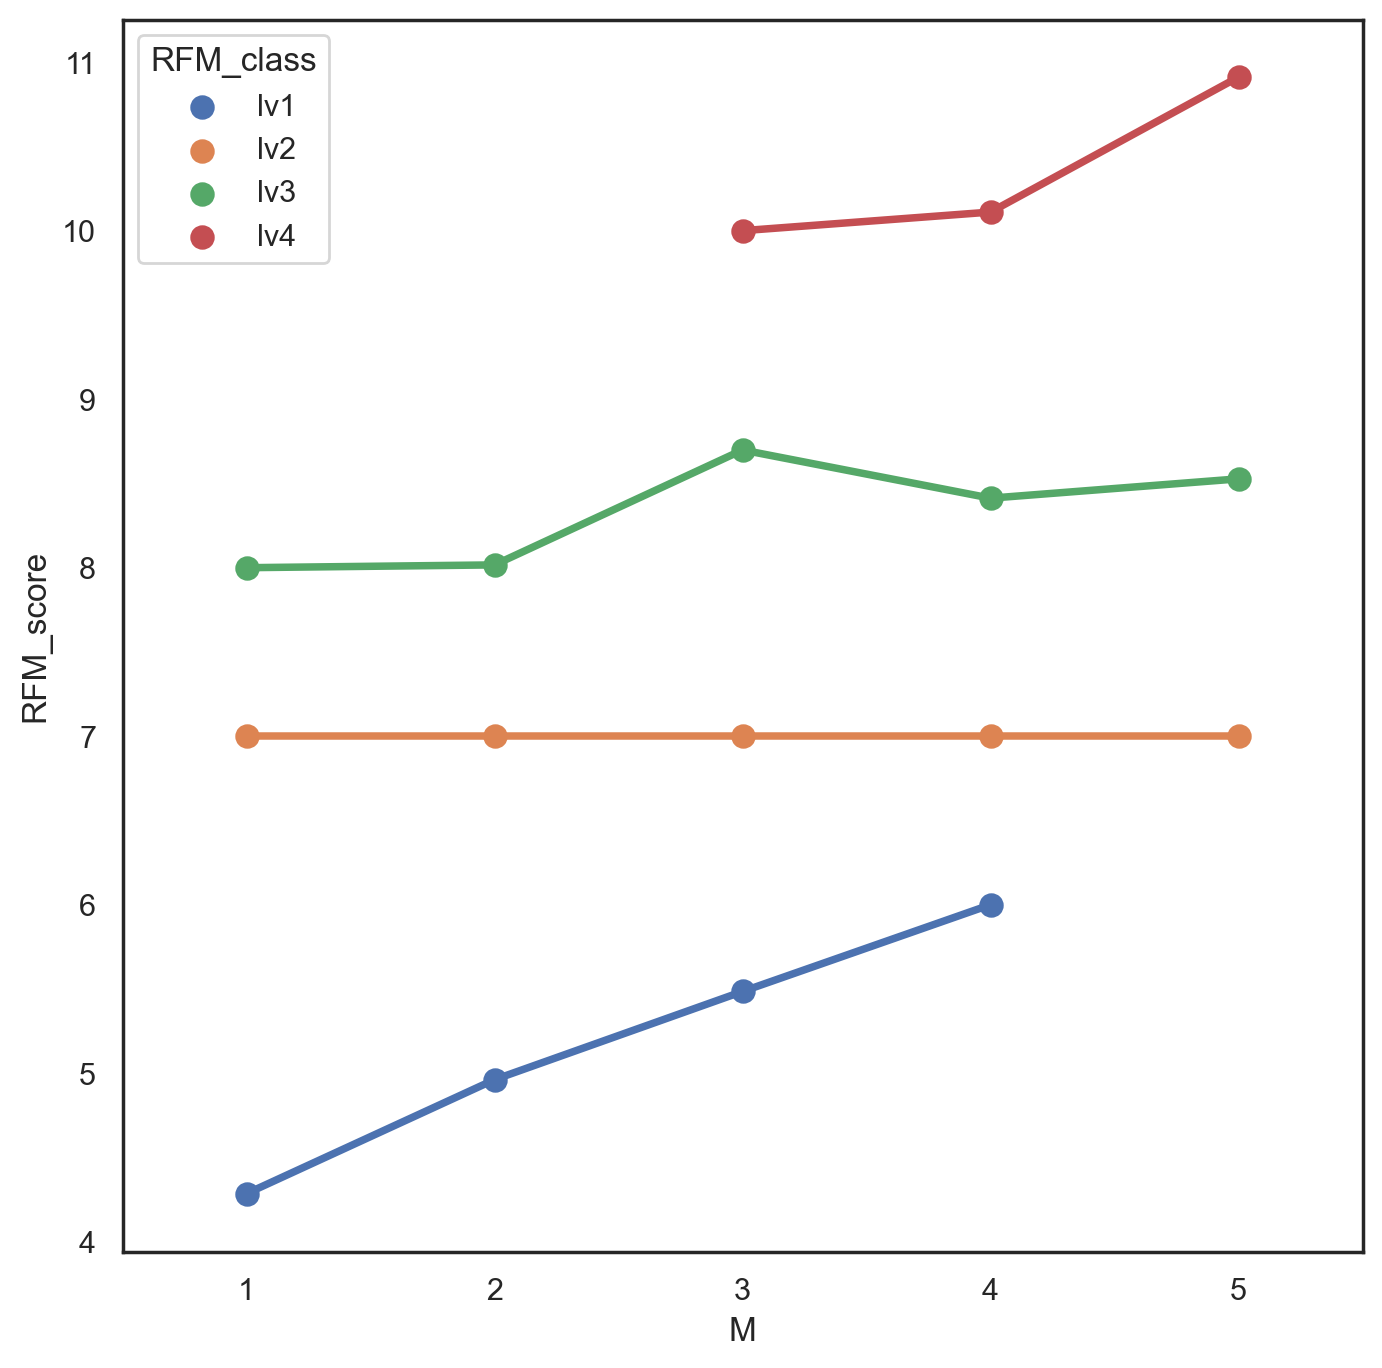

In [227]:
sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [229]:
rfm_class_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count"]})

In [220]:
rfm_class_agg.style.background_gradient(cmap="Oranges").format("{:,.0f}")

### rfm class별 분포

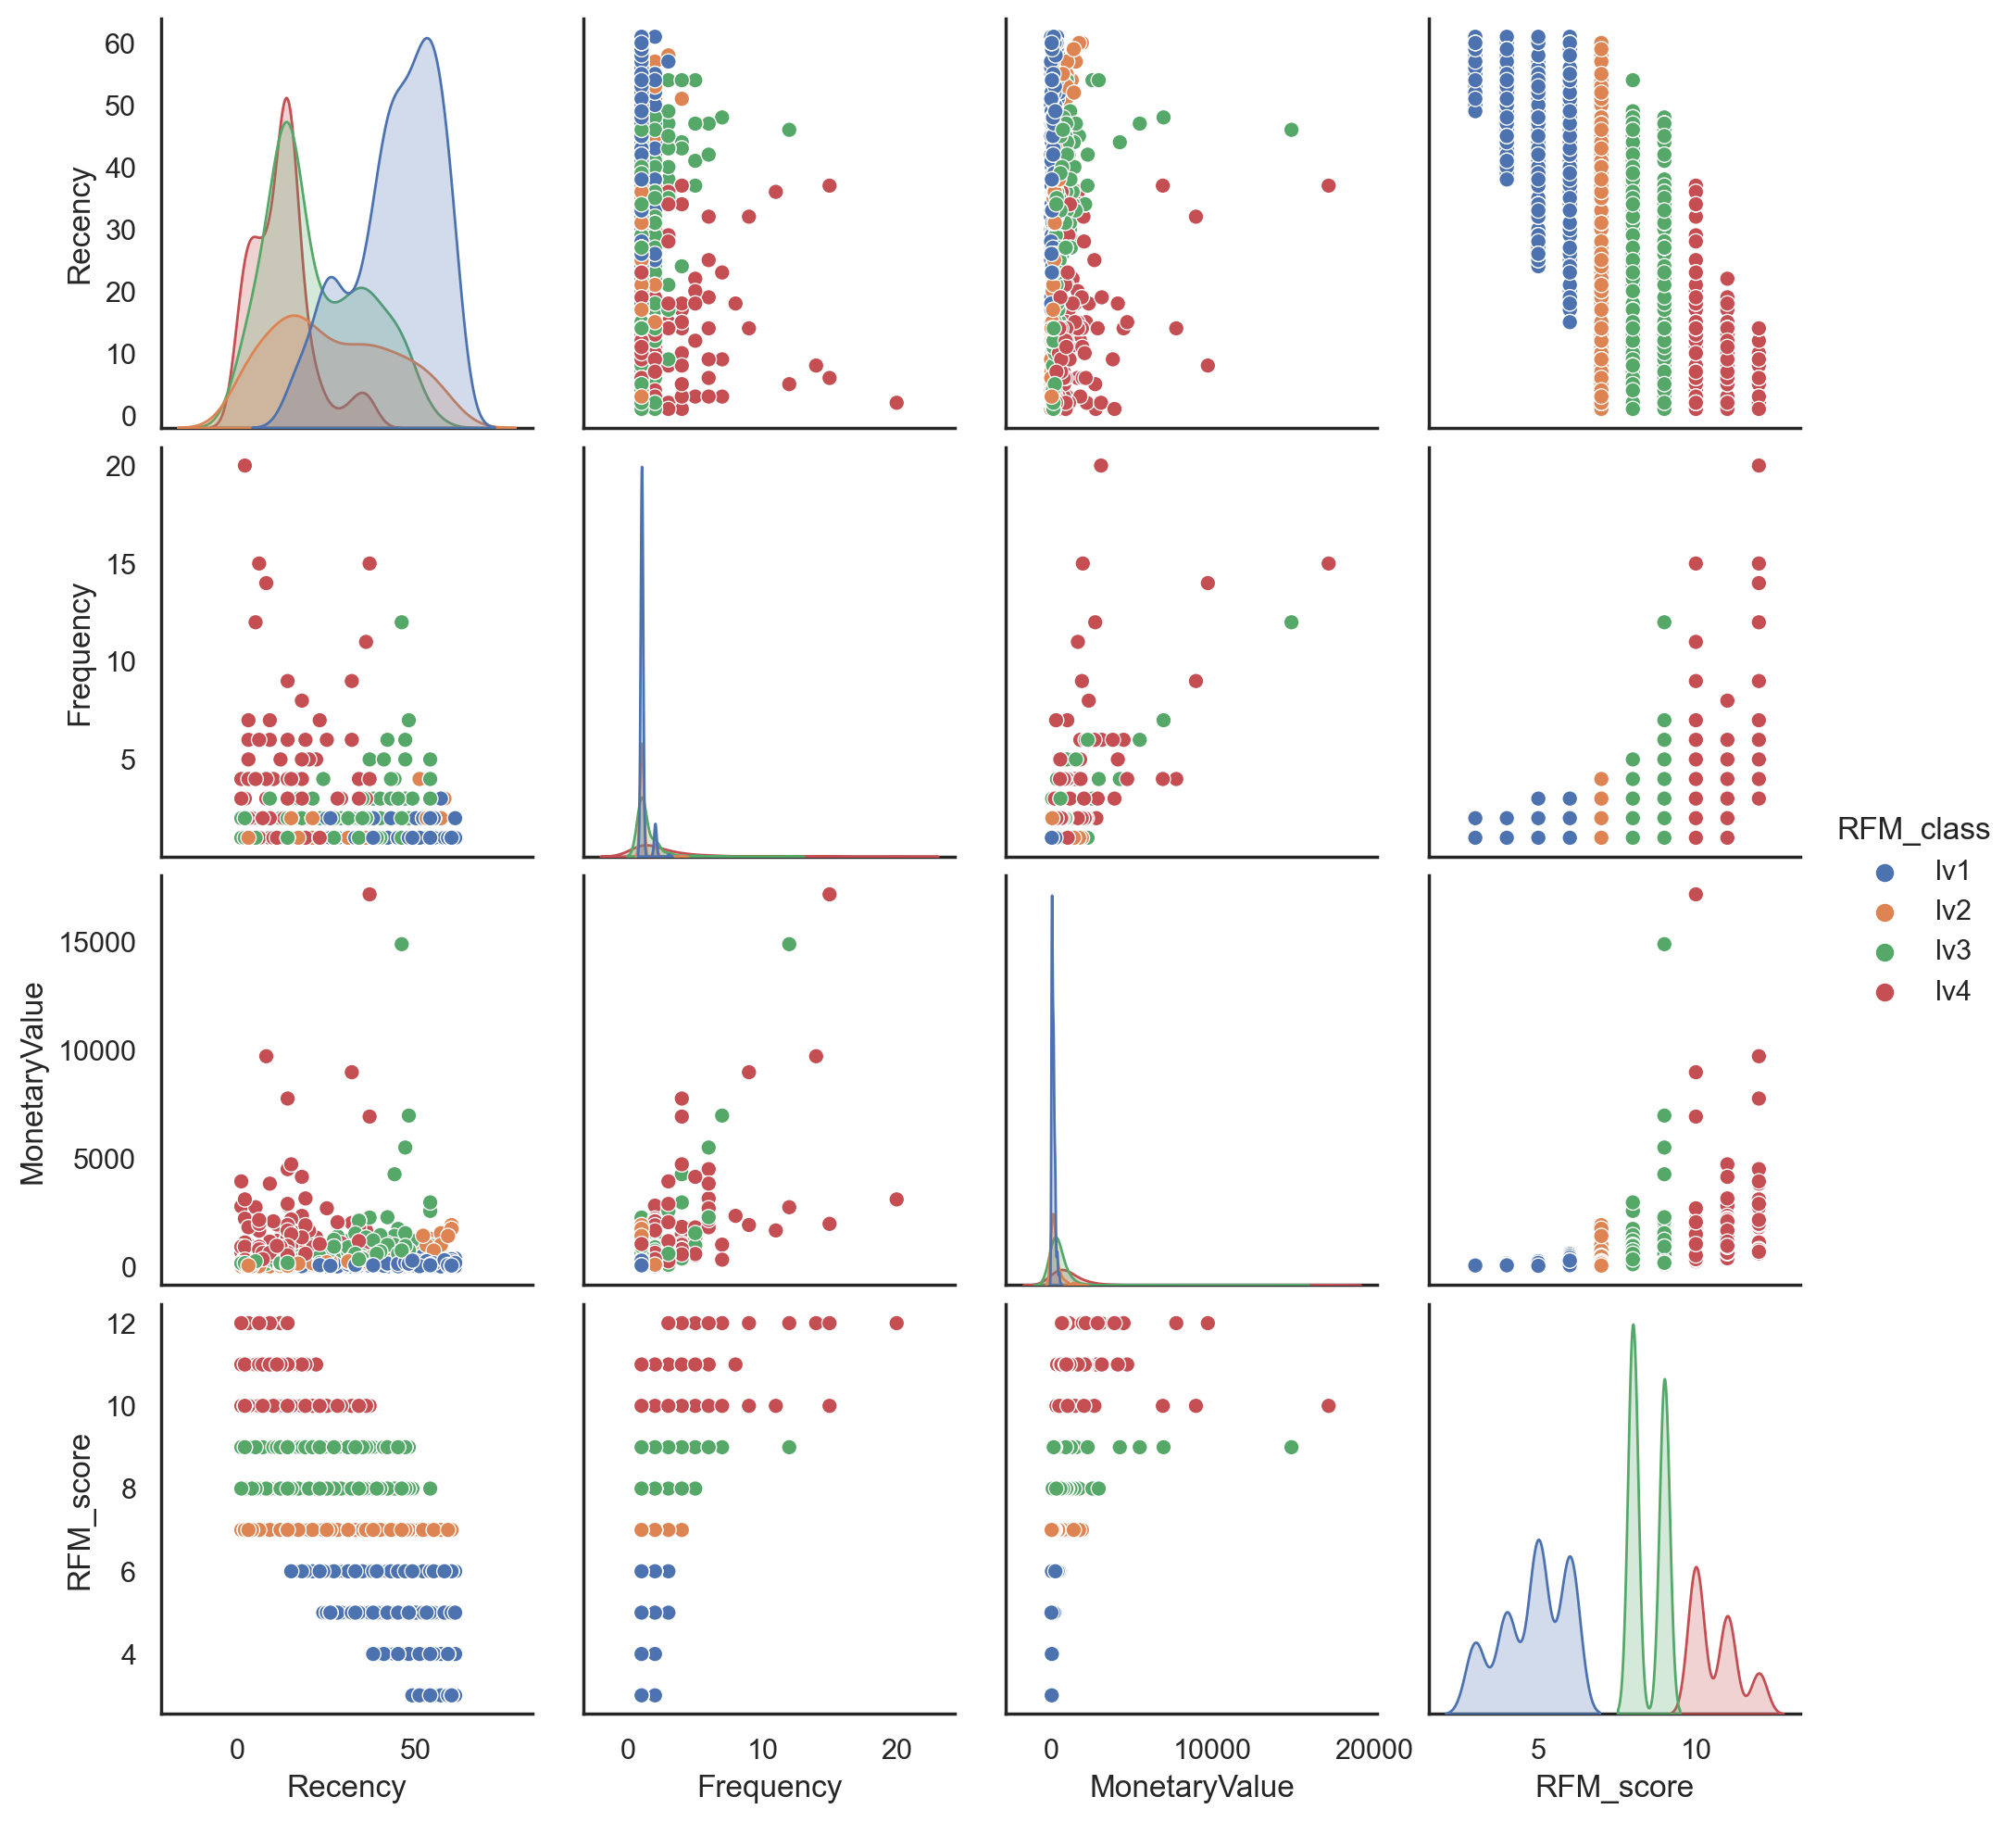

In [200]:
sns.pairplot(data=rfm.sample(1000), hue="RFM_class")

In [201]:
corr = rfm.corr(numeric_only=True)
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.109352,-0.065253,-0.709033
Frequency,-0.109352,1.000000,0.678514,0.335314
MonetaryValue,-0.065253,0.678514,1.000000,0.404609
RFM_score,-0.709033,0.335314,0.404609,1.000000


In [202]:
mask = np.triu(np.ones_like(corr))

### rfm의 상관계수

<Axes: >

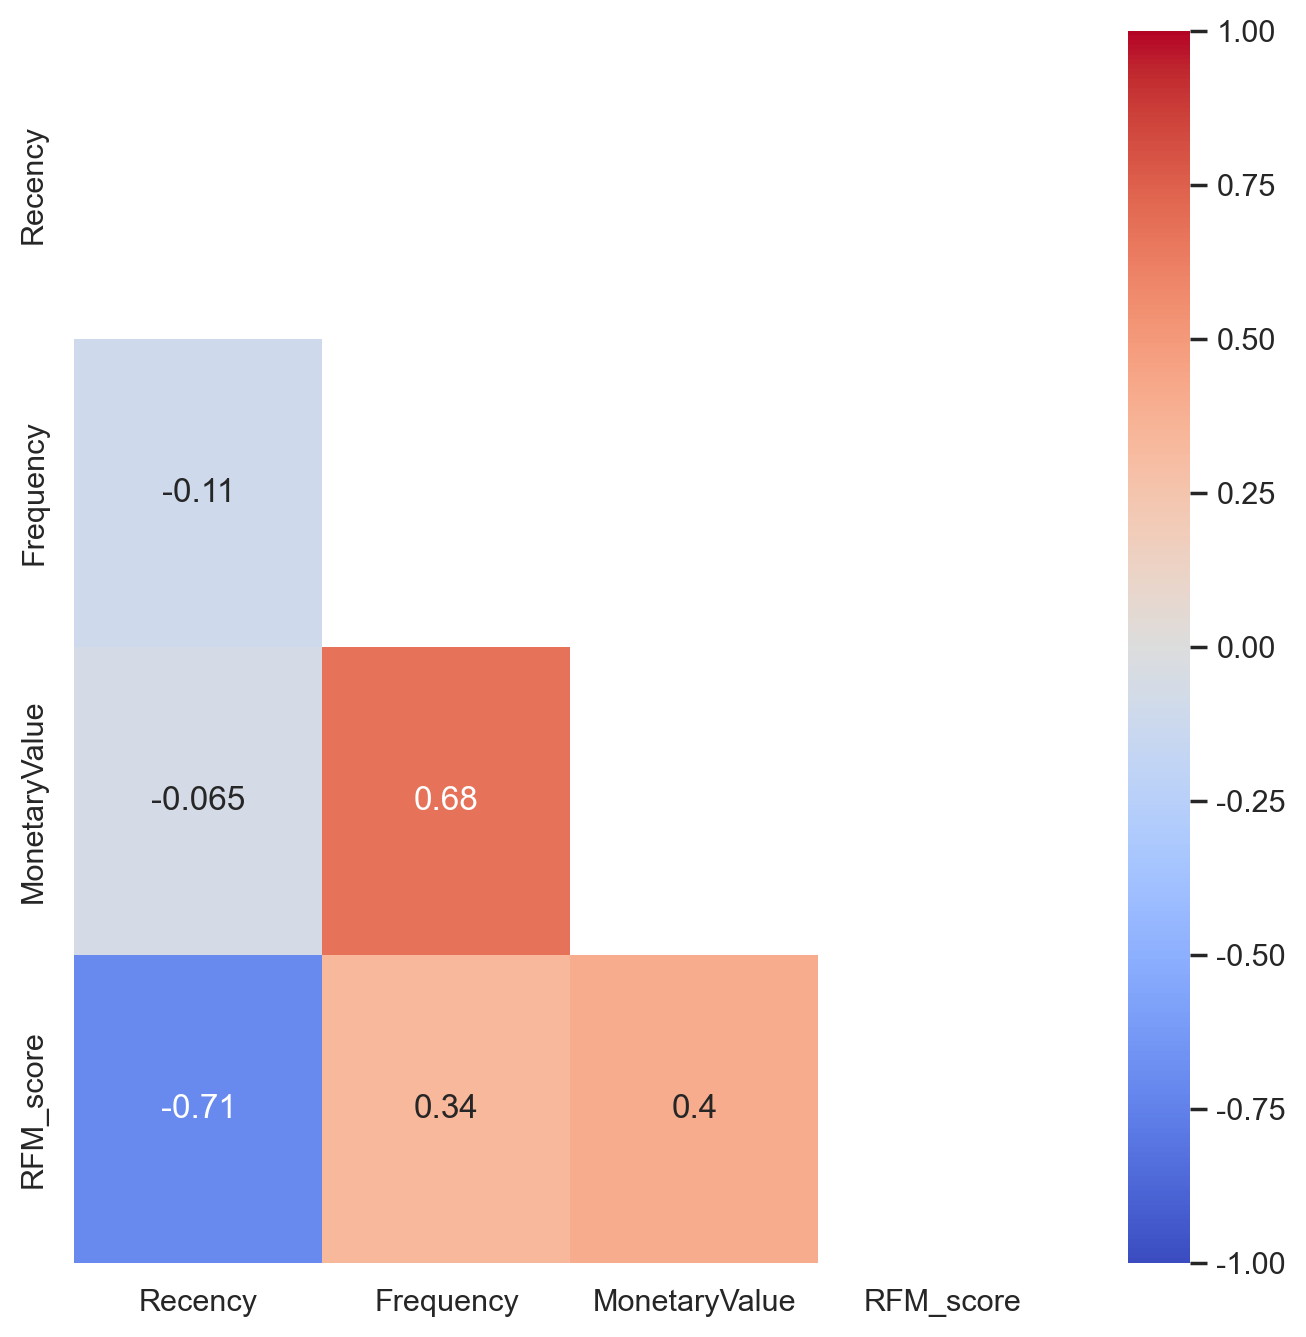

In [203]:
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, mask=mask)

In [204]:
rfm_cluster = rfm.iloc[:, :3]
print(rfm_cluster.shape)
rfm_cluster.head(3)

(217637, 3)


,Recency,Frequency,MonetaryValue
user_id,,,
138340325,20,1,93.50
264649825,56,2,1240.04
296197073,1,1,51.46


In [205]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,217637.000000,217637.000000,217637.000000
mean,30.308054,1.429366,436.292236
std,17.545066,1.461633,884.253077
min,1.000000,1.000000,0.770000
25%,14.000000,1.000000,92.380000
50%,31.000000,1.000000,201.030000
75%,46.000000,1.000000,469.770000
max,61.000000,116.000000,72815.050000


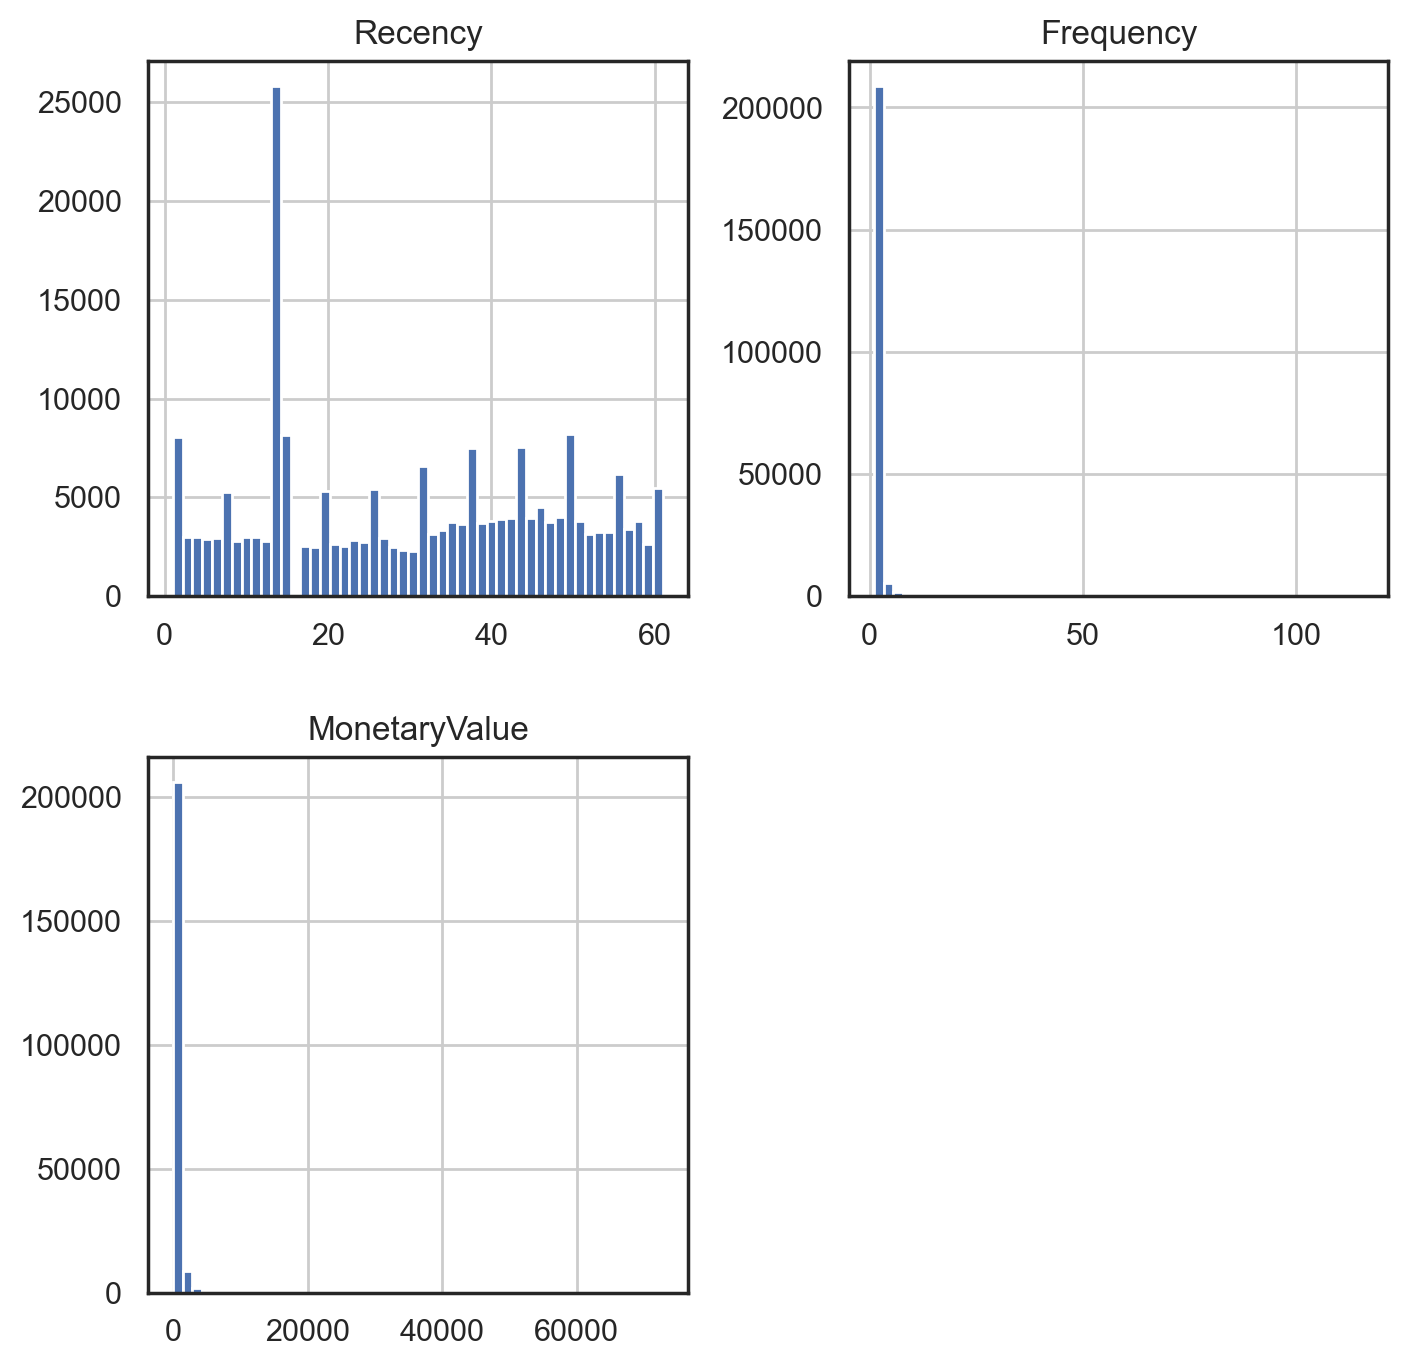

In [206]:
rfm_cluster.hist(bins=50);

In [207]:
rfm_cluster_log = np.log(rfm_cluster + 1)
rfm_cluster_log.head(2)

,Recency,Frequency,MonetaryValue
user_id,,,
138340325,3.044522,0.693147,4.548600
264649825,4.043051,1.098612,7.123705


In [208]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,217637.000000,217637.000000,217637.000000
mean,3.204258,0.823670,5.322865
std,0.800120,0.298288,1.242821
min,0.693147,0.693147,0.570980
25%,2.708050,0.693147,4.536677
50%,3.465736,0.693147,5.308416
75%,3.850148,0.693147,6.154370
max,4.127134,4.762174,11.195692


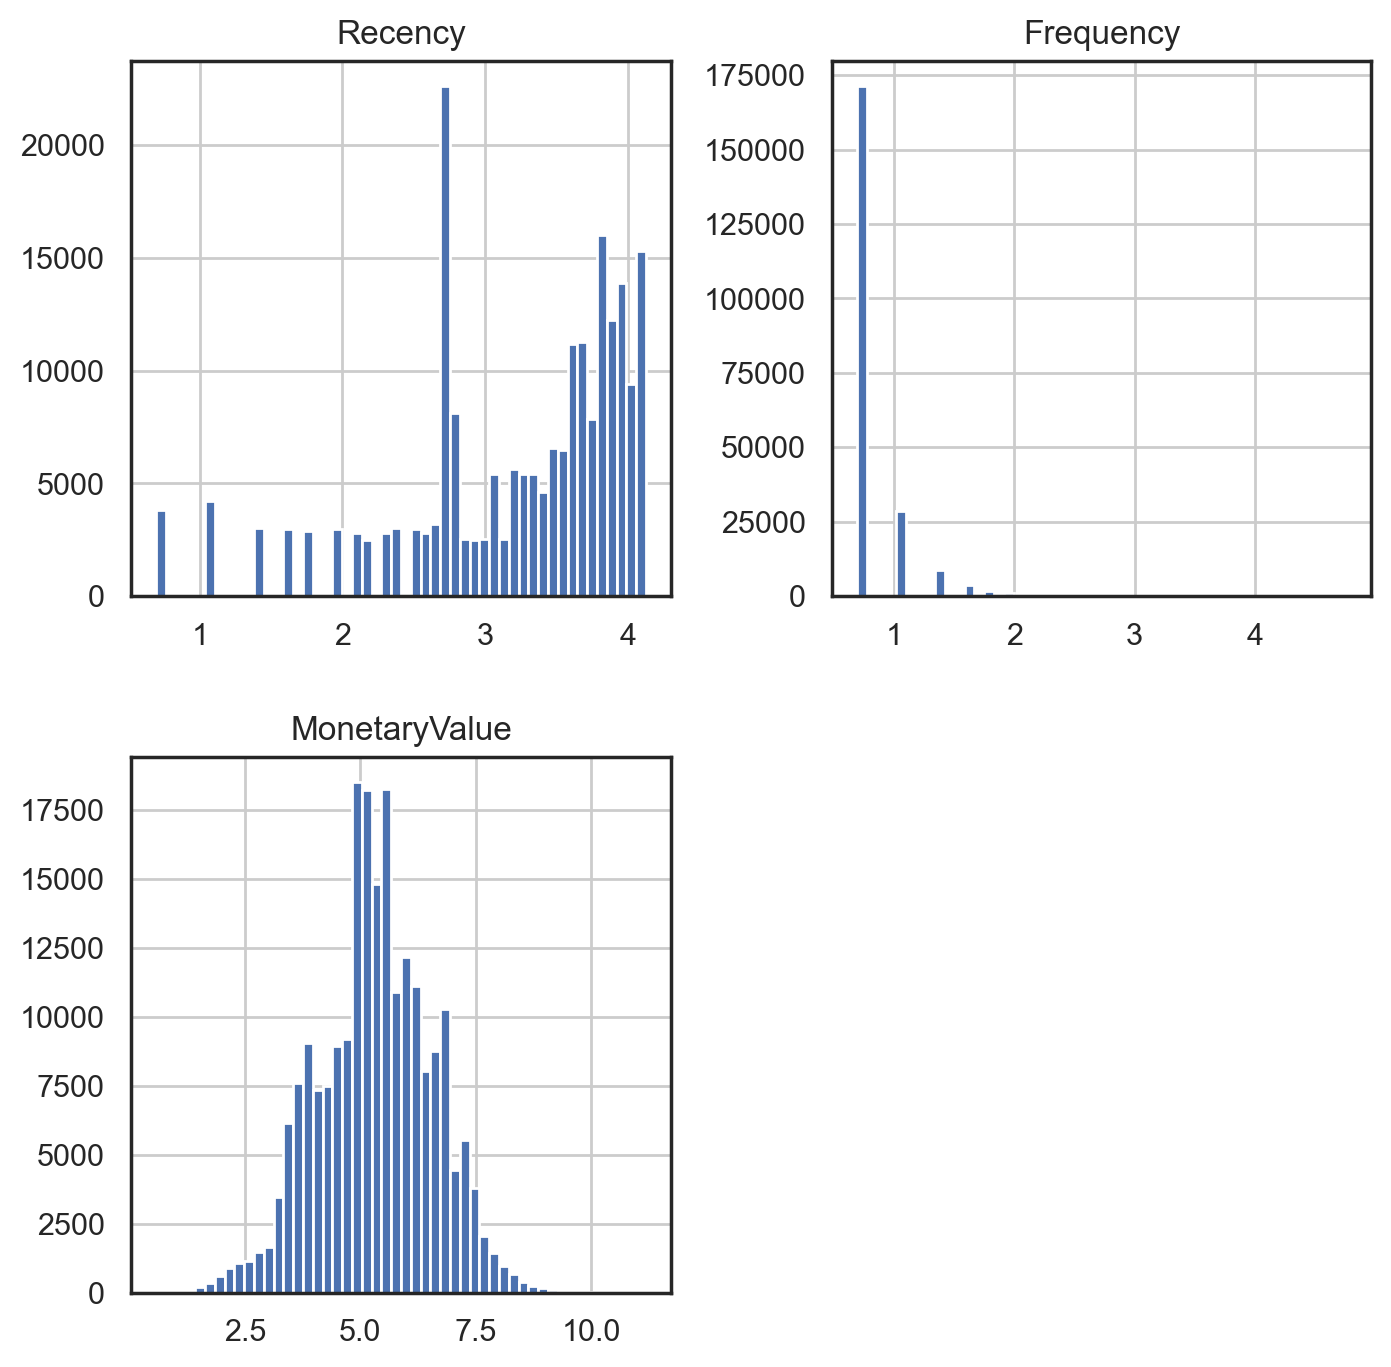

In [209]:
rfm_cluster_log.hist(bins=50);

In [231]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
138340325,20,1,93.50,4,1,2,412,7,lv2
264649825,56,2,1240.04,1,1,5,115,7,lv2
296197073,1,1,51.46,5,1,1,511,7,lv2
304707635,18,1,2007.52,4,1,5,415,10,lv4
307138432,23,1,106.57,4,1,2,412,7,lv2
...,...,...,...,...,...,...,...,...,...
579930533,1,1,227.64,5,1,3,513,9,lv3
579938391,1,1,181.21,5,1,3,513,9,lv3
579939979,1,1,321.73,5,1,4,514,10,lv4


## rfm segment가 가장 높은 고객 선정(525)
- vip고객 선정

In [236]:
target_string = '525'
filtered_df = rfm[rfm['RFM_segment'].str.contains(target_string)]
filtered_df

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
489085769,7,7,1022.30,5,2,5,525,12,lv4
512364323,11,9,14084.20,5,2,5,525,12,lv4
512364736,10,4,663.88,5,2,5,525,12,lv4
512365864,1,6,886.42,5,2,5,525,12,lv4
512368168,10,4,1292.72,5,2,5,525,12,lv4
...,...,...,...,...,...,...,...,...,...
579067245,1,3,2382.38,5,2,5,525,12,lv4
579158633,1,4,644.98,5,2,5,525,12,lv4
579341378,1,4,1412.13,5,2,5,525,12,lv4


## rfm segment가 가장 낮은 고객(111)
- 가장 점수가 낮은 일반고객 선정

In [237]:
target_string = '111'
filtered_df = rfm[rfm['RFM_segment'].str.contains(target_string)]
filtered_df

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
437371552,60,1,22.11,1,1,1,111,3,lv1
467449679,60,1,58.95,1,1,1,111,3,lv1
473668240,53,1,19.82,1,1,1,111,3,lv1
477366703,61,1,40.39,1,1,1,111,3,lv1
490354170,56,1,38.35,1,1,1,111,3,lv1
...,...,...,...,...,...,...,...,...,...
559874977,49,1,28.42,1,1,1,111,3,lv1
559885611,49,1,23.02,1,1,1,111,3,lv1
559904618,49,1,66.90,1,1,1,111,3,lv1
